## Question 3.21

The tensile strength of Kraft paper (a strong, coarse and usually brownish type of paper) was measured [18, 19] for different percentages of hardwood concentrations (Table 3.13; data set: `paper`).

1. Plot the data, and show that the data have a non-linear relationship.
2. Determine a suitable polynomial model for the data using `poly()`.
3. Determine a suitable model using a regression spline.
4. Plot the two models (one using `poly()`; one using a regression spline) on the data, and comment.

### Answers to 3.21

In [ ]:
install.packages("GLMsData")
library(GLMsData)

data(paper)
d <- paper
head(d)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



,Strength,Hardwood
,<dbl>,<dbl>
1,6.3,1.0
2,11.1,1.5
3,20.0,2.0
4,24.0,3.0
5,26.1,4.0
6,30.0,4.5


#### Answer to 3.21, 1

***Plot the data, and show that the data have a non-linear relationship.***

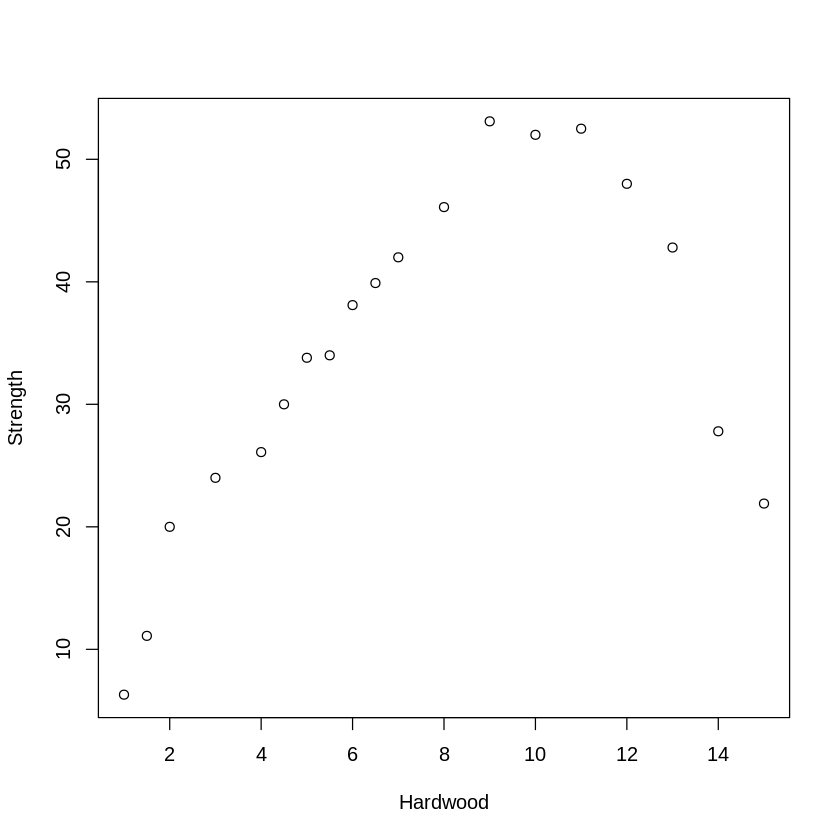

In [ ]:
plot(Strength ~ Hardwood, data=d)

#### Answer to 3.21, 2

***Determine a suitable polynomial model for the data using `poly()`.***

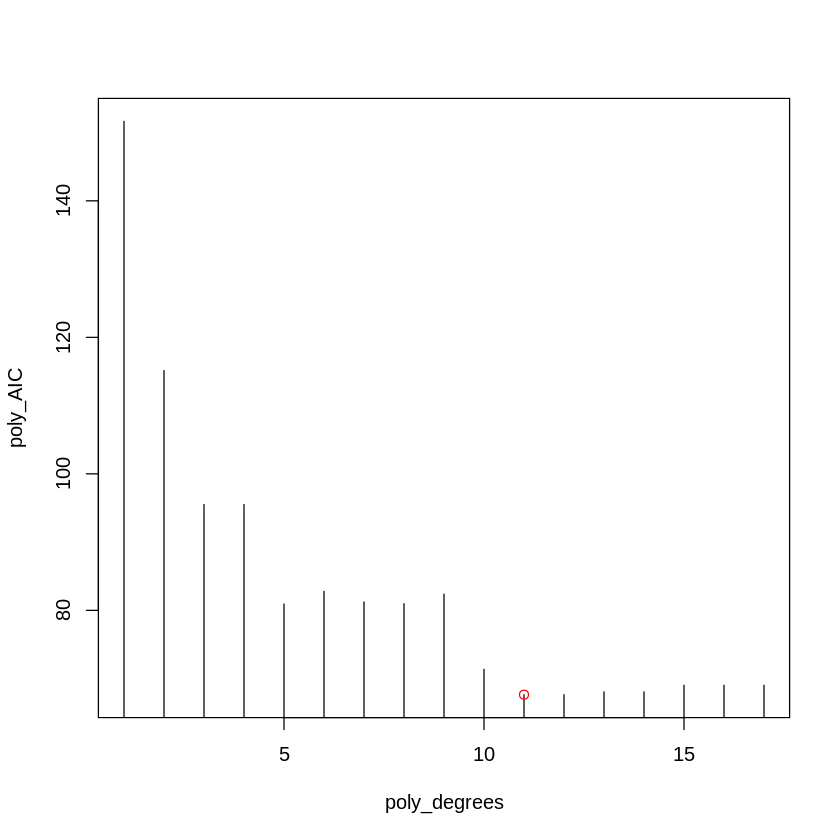

In [ ]:
# Define maximum degree
max_deg <- nrow(d)-2  # Adjust as needed
poly_degrees <- 1:max_deg
polys <- list()

for (deg in poly_degrees) {
  # Create a formula with polynomial terms manually
  formula_terms <- paste("I(Hardwood^", 1:deg, ")", collapse = " + ")
  formula <- as.formula(paste("Strength ~", formula_terms))

  model_name <- paste0("p", deg)
  polys[[model_name]] <- lm(formula, data = d)
}

# Calculate AIC for each model
poly_AIC <- sapply(polys, AIC)

# Identify the best model
best_poly_index <- which.min(poly_AIC)
best_poly_name <- names(poly_AIC)[best_poly_index]
best_poly_model <- polys[[best_poly_name]]
best_poly_degree <- as.numeric(sub("p", "", best_poly_name))

plot(poly_AIC ~ poly_degrees, type="h")
points(poly_AIC[best_poly_index] ~ best_poly_index, col="red")

#### Answer to 3.21, 3

***Determine a suitable model using a regression spline.***

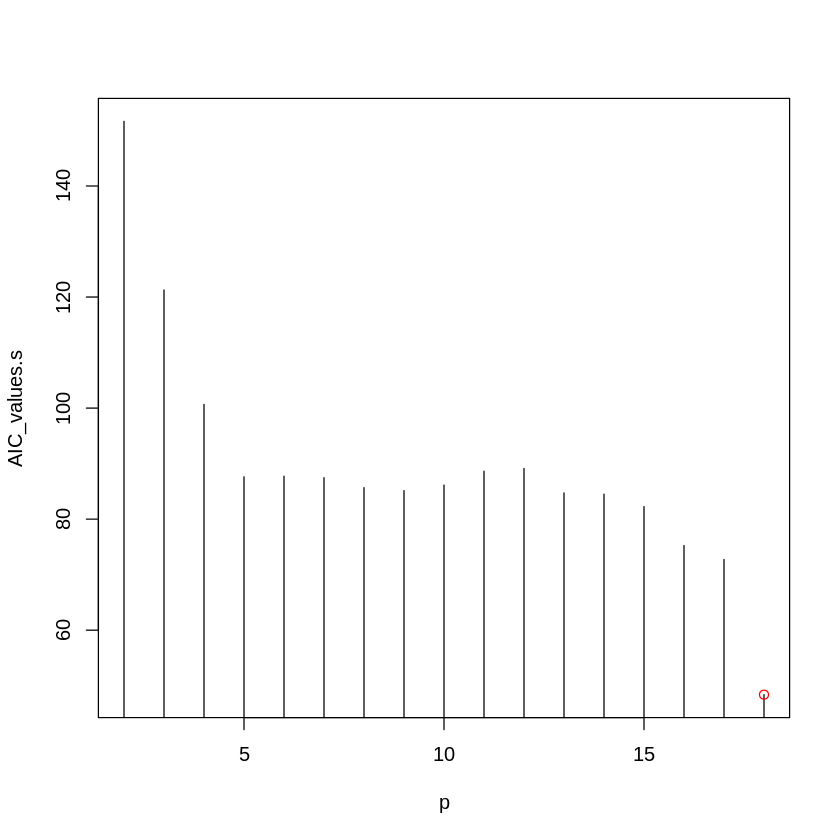

In [ ]:
library(splines)

splines <- list()
n <- nrow(d)-2
for(knot in 1:n) {
  spline_name <- paste0("s", knot)
  splines[[spline_name]] <- lm(Strength ~ ns(Hardwood, df=knot), data = d)
}

AIC_values.s <- sapply(splines, AIC)
best_index <- which.min(AIC_values.s)
best_p <- best_index + 1
best_AIC.s <- AIC_values[best_index]

p <- 2:(n + 1)
plot(AIC_values.s ~ p, type="h")
points(AIC_values.s[best_index] ~ best_p, col = "red")

#### Answer to 3.21, 4

***Plot the two models (one using `poly()`; one using a regression spline) on the data, and comment.***

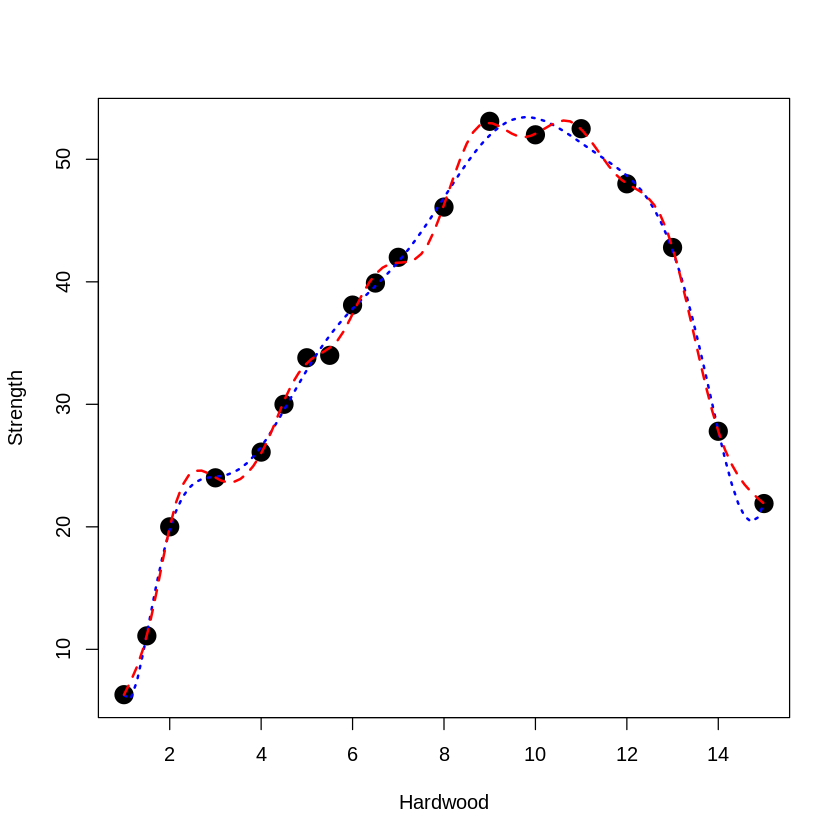

In [ ]:
H_seq <- seq(from=min(d$Hardwood), to=max(d$Hardwood), length=100)
poly_pred <- predict(best_poly_model, newdata = data.frame(Hardwood = H_seq))
spline_pred <- predict(splines[[which.min(AIC_values.s)]], newdata=data.frame(Hardwood=H_seq))


plot(Strength ~ Hardwood, data=d, pch=19, cex=2)
lines(poly_pred ~ H_seq, lty=3, col="blue", lwd=2)
lines(spline_pred ~ H_seq, lty=2, col="red", lwd=2)

## Question 3.22

An experiment was conducted to measure heat developed by setting cement with varying constituents (data set: `setting`).

1. Plot each explanatory variable against heat evolved, and decide which constituents appear to be related to heat evolved.
2. Fit the linear regression model predicting heat evolved from the explanatory variables A, B, C and D (that is, no interactions). Using t-tests, determine which explanatory variables appear statistically significant. Compare to your decisions in the previous part of this question.
3. Show that collinearity may be a problem. Explain why this may be the case, and propose a solution.
4. Fit the amended model, and compare the t-test results to the t-test results from the initial model above.

### Answers

In [ ]:
#install.packages("GLMsData")
library(GLMsData)

data(setting)
d <- setting
head(d)
?setting

,A,B,C,D,Heat
,<int>,<int>,<int>,<int>,<dbl>
1,7,26,6,60,78.5
2,1,29,15,52,74.3
3,11,56,8,20,104.3
4,11,31,8,47,87.6
5,7,52,6,33,95.9
6,11,55,9,22,109.2


#### Answer to 3.22, 1

***Plot each explanatory variable against heat evolved, and decide which constituents appear to be related to heat evolved.***

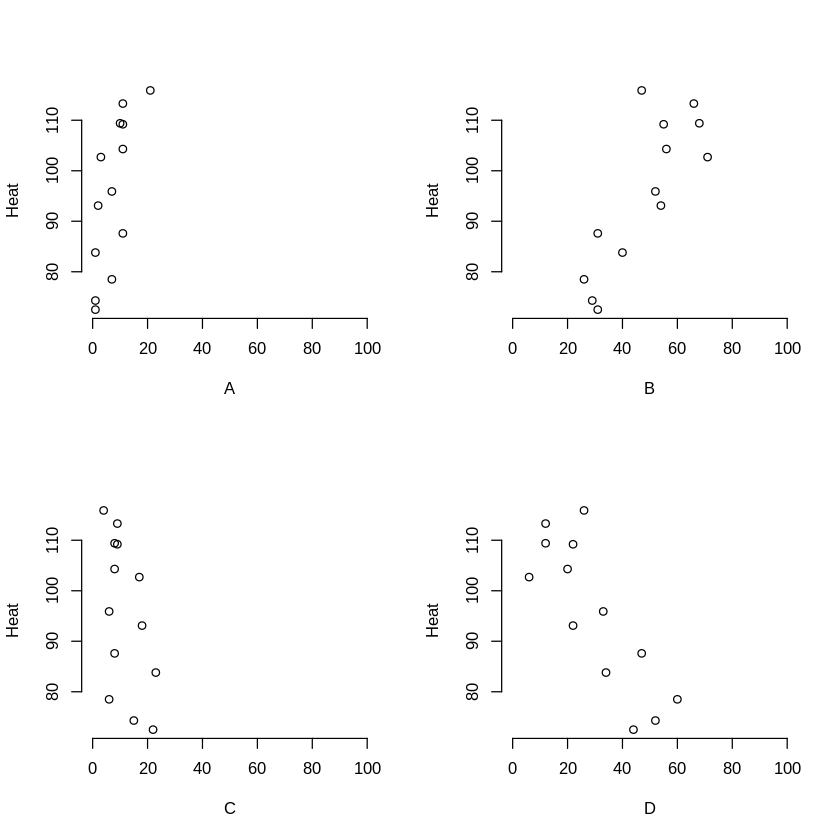

In [ ]:
par(mfrow=c(2,2))
plot(Heat ~ A*B*C*D,
     xlim=c(0,100),
     bty="n",
     data=d)

By looking at the individual plots, B `B` and `D` have appear to be related to `Heat` since the other two (`A` and `C`) are basically vertically stacked.  But this type of visual analysis can be misleading.  For example, these substances are presumably interacting such that the apparent relationship of, say, `B` depends on, say, `A`.

#### Answer to 3.22, 2

***Fit the linear regression model predicting heat evolved from the explanatory variables A, B, C and D (that is, no interactions). Using t-tests, determine which explanatory variables appear statistically significant. Compare to your decisions in the previous part of this question.***

In [ ]:
m_ABCD <- lm(Heat ~ ., data=d)
summary(m_ABCD)


Call:
lm(formula = Heat ~ ., data = d)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.1750 -1.6709  0.2508  1.3783  3.9254 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)  62.4054    70.0710   0.891   0.3991  
A             1.5511     0.7448   2.083   0.0708 .
B             0.5102     0.7238   0.705   0.5009  
C             0.1019     0.7547   0.135   0.8959  
D            -0.1441     0.7091  -0.203   0.8441  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.446 on 8 degrees of freedom
Multiple R-squared:  0.9824,	Adjusted R-squared:  0.9736 
F-statistic: 111.5 on 4 and 8 DF,  p-value: 4.756e-07


The problem with using plots to determine a suitable model are now apparent: whereas the plots suggested that `B` and `D` were important, controlling for each variable in regression finds that `A` is most important.

#### Answer to 3.22, 3

***Show that collinearity may be a problem. Explain why this may be the case, and propose a solution.***

When we look at the `Std. Error` estimates for the coefficients above, we notice they're pretty large in comparison to their `Estimate`.  This is an indication of multicollinearity.  The basic idea is that, if two or more variables share (much of) the same information, then we're uncertain about how important each variable is.  It's a little like trying to solve $7 = a + b$ for $a$ and/or $b$.  Can't find a single solution since any value of $a$ can be compensated with a certain value of $b$.

We can look for multicollinearity in a few ways, including looking at the correlation among variables.

,A,B,C,D
A,1.00,0.23,-0.82,-0.25
B,0.23,1.00,-0.14,-0.97
C,-0.82,-0.14,1.00,0.03
D,-0.25,-0.97,0.03,1.00


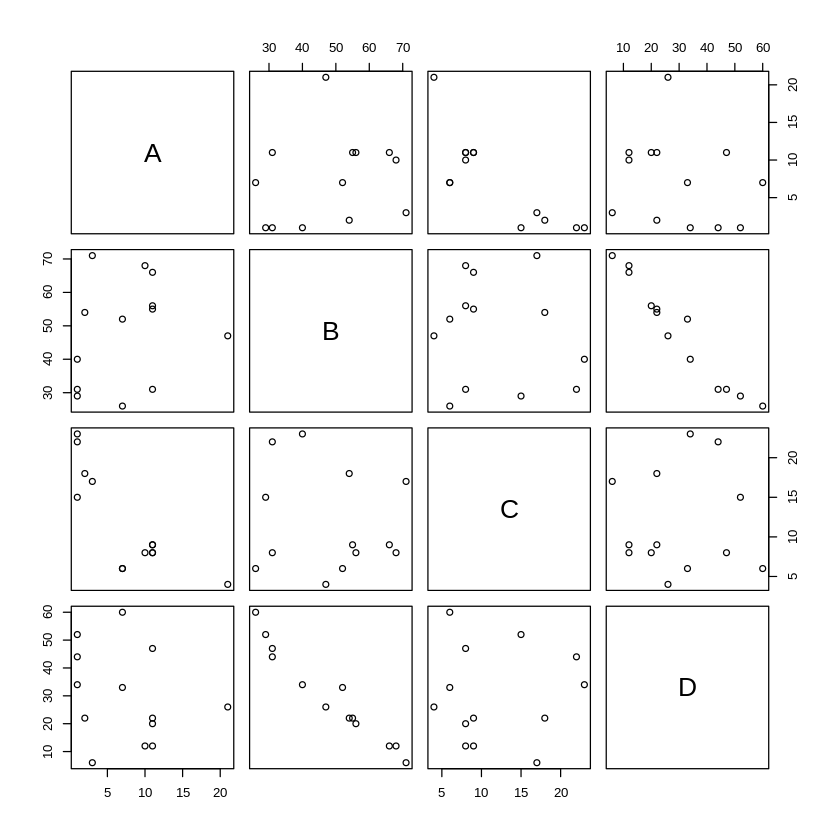

In [ ]:
round(cor(d[,1:4]),2)
pairs(d[,1:4])

There is a strong relationship between `B` and `D`, suggesting multicollinearity.

But the most direct way is to assess this is the "variance inflation factor" (VIF).

The VIF measures hows much the variance of a regression coefficient is increased due to multicollinearity.  The formula for VIF is

$$VIF(X_j) = \frac{1}{1 - R^2_j}$$

where $R^2_j$ is the coefficient of determination ($R^2$) obtained by regressing the outcome $Y$ on all predictor variables $\boldsymbol{X}$ except $X_j$.

The intuition is this: $1 - R^2_j$ is the amount of variance left unexplained after regression on all but $X_j$.  If $X_j$ gives much independent information, this value will be large; if not, then this value will be small.  A large $1 - R^2_j$ will divide $1$ into small quantity (hence, low VIF) while a small $1 - R^2_j$ will divide 1 into a large quantity (large VIF).  Hence, a predictor variable $X_j$ that provides information that is unique among all other predictors will have a small VIF (and vice versa).

In [ ]:
#install.packages("car")
library(car)
as.data.frame(round(vif(m_ABCD),2))

,"round(vif(m_ABCD), 2)"
,<dbl>
A,38.50
B,254.42
C,46.87
D,282.51


In truth, each of these values are high (> 5 is often considered problematic), but `B` and `D` are the worst offenders.

To solve this, we could try dropping `B` or `D`.

#### Answer to Question 3.22, 4

***Fit the amended model, and compare the t-test results to the t-test results from the initial model above.***

In [ ]:
m_ABC <- lm(Heat ~ A+B+C, data=d)
summary(m_ABC)
as.data.frame(round(vif(m_ABC),2))

m_ACD <- lm(Heat ~ A+C+D, data=d)
summary(m_ACD)
as.data.frame(round(vif(m_ACD),2))


Call:
lm(formula = Heat ~ A + B + C, data = d)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.2543 -1.4726  0.1755  1.5409  3.9711 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 48.19363    3.91330  12.315 6.17e-07 ***
A            1.69589    0.20458   8.290 1.66e-05 ***
B            0.65691    0.04423  14.851 1.23e-07 ***
C            0.25002    0.18471   1.354    0.209    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.312 on 9 degrees of freedom
Multiple R-squared:  0.9823,	Adjusted R-squared:  0.9764 
F-statistic: 166.3 on 3 and 9 DF,  p-value: 3.367e-08


,"round(vif(m_ABC), 2)"
,<dbl>
A,3.25
B,1.06
C,3.14



Call:
lm(formula = Heat ~ A + C + D, data = d)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.9323 -1.8090  0.4806  1.1398  3.7771 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 111.68441    4.56248  24.479 1.52e-09 ***
A             1.05185    0.22368   4.702  0.00112 ** 
C            -0.41004    0.19923  -2.058  0.06969 .  
D            -0.64280    0.04454 -14.431 1.58e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.377 on 9 degrees of freedom
Multiple R-squared:  0.9813,	Adjusted R-squared:  0.975 
F-statistic: 157.3 on 3 and 9 DF,  p-value: 4.312e-08


,"round(vif(m_ACD), 2)"
,<dbl>
A,3.68
C,3.46
D,1.18


## Question 3.23

A compilation of data [1] from various studies of Gopher tortoises linked the mean clutch size to environmental variables for 19 populations of the tortoises (Table 3.15; data set: `gopher`).

1. Plot the mean clutch size against the temperature and evapotranspiration. Comment on the relationships.

2. Explain why a weighted linear regression model is appropriate.

3. Fit a weighted linear regression model for modelling `ClutchSize` using `Evap` and `Temp` as explanatory variables. Produce the t-tests, and comment.

4. Compute the anova table for the fitted model, and comment.

5. Show that collinearity is evident in the data.

6. Perform a diagnostic analysis of this model. Be sure to test spatial independence by plotting the residuals against `Latitude`.

### Answers

In [ ]:
install.packages("GLMsData")
library(GLMsData)

data(gopher)
d <- gopher
head(d)

,Site,Latitude,Evap,Temp,ClutchSize,SampleSize
,<int>,<dbl>,<int>,<dbl>,<dbl>,<int>
1,1,26.8,1318,24.0,8.2,23
2,2,27.3,1193,22.2,6.5,8
3,3,27.7,1112,22.7,7.6,32
4,4,28.0,1171,22.6,7.1,19
5,5,28.5,1116,21.4,4.8,12
6,6,28.5,1116,21.4,5.8,16


#### Answer to 3.23, 1

***Plot the mean clutch size against the temperature and evapotranspiration. Comment on the relationships.***

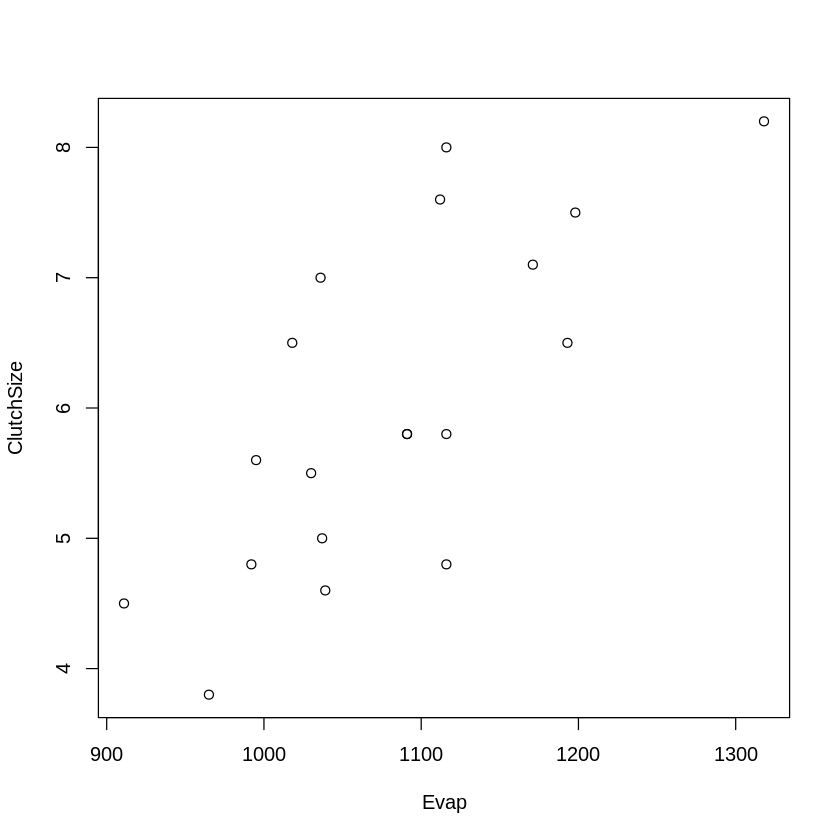

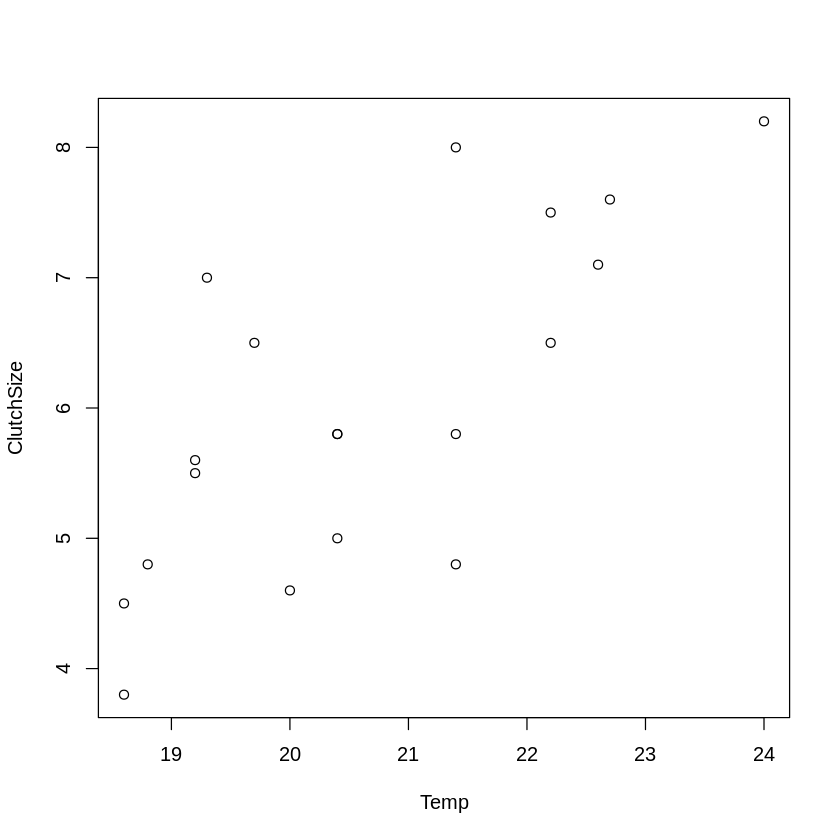

In [ ]:
plot(ClutchSize ~ Evap+Temp, data=d)

#### Answer to 3.23, 2

***Explain why a weighted linear regression model is appropriate.***

To answer this, we need to look at the data file for `gopher`.

In [ ]:
?gopher

We see that

* `ClutchSize` the mean clutch size; a numeric vector

* `SampleSize` the size of the sample upon which the `ClutchSize` was computed; a numeric vector

So the different data points for `ClutchSize` are not comprised of equal numbers of observations; hence, we should weight by `SampleSize`.

#### Answer to 3.23, 3

***Fit a weighted linear regression model for modelling `ClutchSize` using `Evap` and `Temp` as explanatory variables. Produce the t-tests, and comment.***

In [ ]:
m_wtd <- lm(ClutchSize ~ Evap+Temp, weights=SampleSize, data=d)
summary(m_wtd)


Call:
lm(formula = ClutchSize ~ Evap + Temp, data = d, weights = SampleSize)

Weighted Residuals:
    Min      1Q  Median      3Q     Max 
-6.1069 -2.8587 -0.9348  1.7737 10.5469 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)  
(Intercept) -6.028664   2.603663  -2.315   0.0342 *
Evap         0.004550   0.006081   0.748   0.4651  
Temp         0.351089   0.350390   1.002   0.3313  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.473 on 16 degrees of freedom
Multiple R-squared:  0.5819,	Adjusted R-squared:  0.5297 
F-statistic: 11.13 on 2 and 16 DF,  p-value: 0.0009335


Neither predictor seems particularly important.

#### Answer to 3.23, 4

***Compute the anova table for the fitted model, and comment.***

In [ ]:
anova(m_wtd)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Evap,1,425.39130,425.39130,21.265627,0.0002888652
Temp,1,20.08367,20.08367,1.003997,0.3312590329
Residuals,16,320.05925,20.00370,NA,NA


Here, the `Evap` now seems important.  What's going on?  There's a hint when you realize that the p-value for `Temp` remains the same in both models.  To dig deeper, let's change the model.

In [ ]:
m_wtd2 <- lm(ClutchSize ~ Temp+Evap, weights=SampleSize, data=d)
summary(m_wtd2)

anova(m_wtd2)


Call:
lm(formula = ClutchSize ~ Temp + Evap, data = d, weights = SampleSize)

Weighted Residuals:
    Min      1Q  Median      3Q     Max 
-6.1069 -2.8587 -0.9348  1.7737 10.5469 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)  
(Intercept) -6.028664   2.603663  -2.315   0.0342 *
Temp         0.351089   0.350390   1.002   0.3313  
Evap         0.004550   0.006081   0.748   0.4651  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.473 on 16 degrees of freedom
Multiple R-squared:  0.5819,	Adjusted R-squared:  0.5297 
F-statistic: 11.13 on 2 and 16 DF,  p-value: 0.0009335


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Temp,1,434.27316,434.27316,21.7096383,0.0002617852
Evap,1,11.20181,11.20181,0.5599867,0.4651241815
Residuals,16,320.05925,20.00370,NA,NA


The regression results are the same, but now `Temp` but not `Evap` have different p-values in anova.  The reason is that `anova` makes its calculations sequentially while regression does does simultaneously.  In other words, `anova` first makes calulations on the first predictor in the model, then then the 2nd after having controlled for the first.  Regression controls for each variable every time.

#### Answer to 3.23, 5

***Show that collinearity is evident in the data.***

We already know what to do here from the previous problem.

In [ ]:
install.packages("car")
library(car)

vif(m_wtd)

Evap     Temp 
7.522534 7.522534

Again, vif > 5 is generally considered problematic.

In [ ]:
summary(lm(ClutchSize ~ Temp, d))

summary(lm(ClutchSize ~ Evap, d))


Call:
lm(formula = ClutchSize ~ Temp, data = d)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.66360 -0.55214 -0.06726  0.40475  1.78872 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -6.2981     2.7774  -2.268 0.036676 *  
Temp          0.5963     0.1341   4.448 0.000353 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9003 on 17 degrees of freedom
Multiple R-squared:  0.5378,	Adjusted R-squared:  0.5106 
F-statistic: 19.78 on 1 and 17 DF,  p-value: 0.000353



Call:
lm(formula = ClutchSize ~ Evap, data = d)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.5613 -0.5738 -0.1428  0.3800  1.6387 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -4.586265   2.414205   -1.90 0.074573 .  
Evap         0.009810   0.002224    4.41 0.000383 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9044 on 17 degrees of freedom
Multiple R-squared:  0.5336,	Adjusted R-squared:  0.5062 
F-statistic: 19.45 on 1 and 17 DF,  p-value: 0.0003829


#### Answer to 3.23, 6

***Perform a diagnostic analysis of this model. Be sure to test spatial independence by plotting the residuals against `Latitude`.***

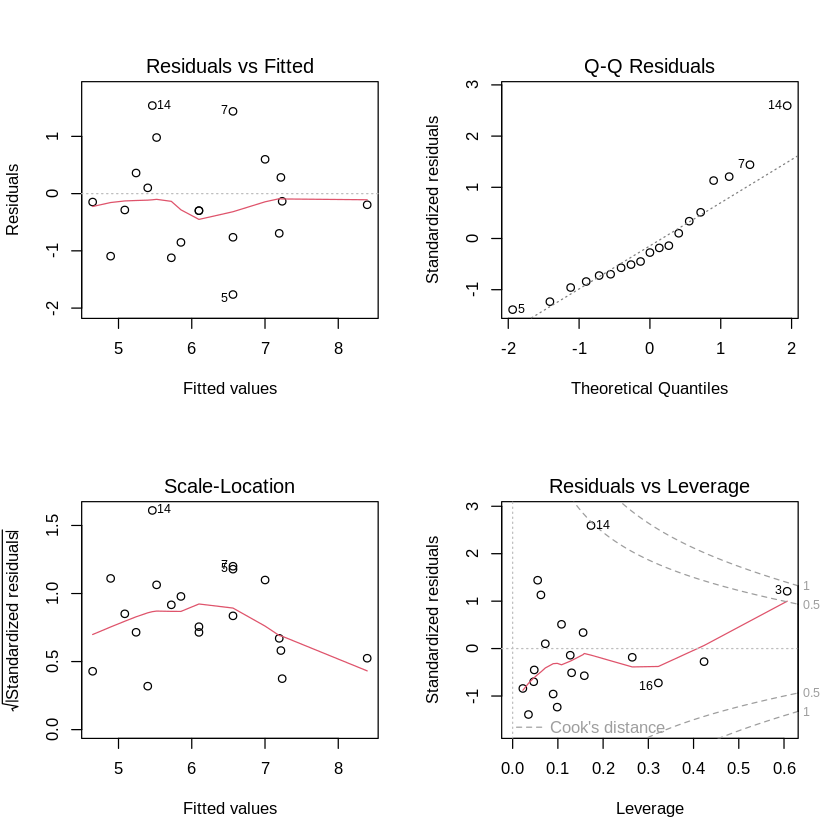

[1] 0.02330962

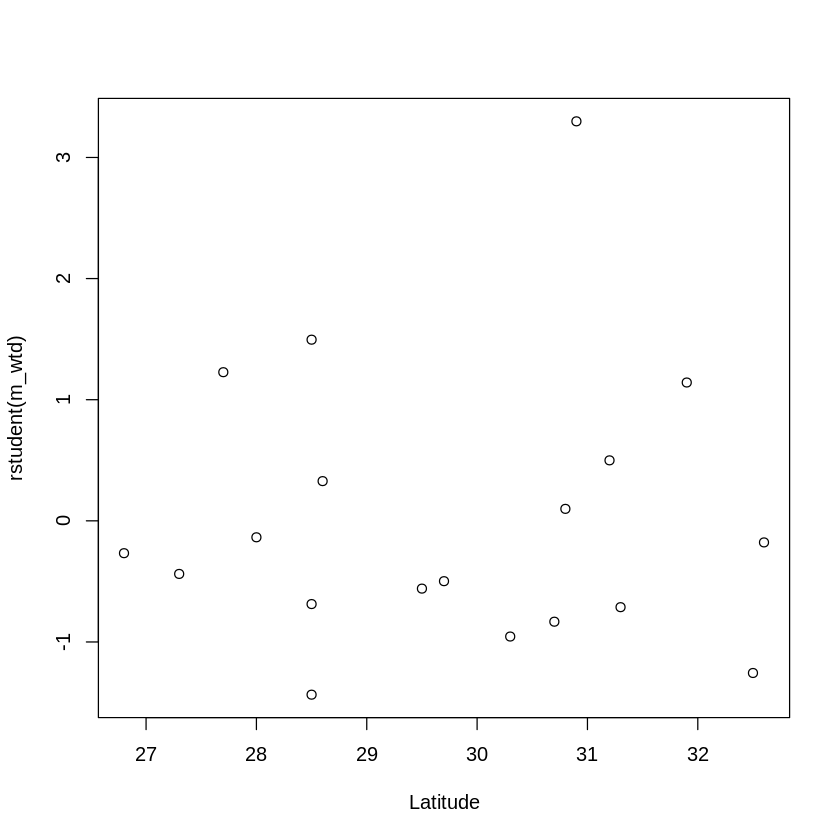

In [ ]:
par(mfrow=c(2,2))
plot(m_wtd)

par(mfrow=c(1,1))
plot(rstudent(m_wtd) ~ Latitude, data=d)
cor(rstudent(m_wtd), d$Latitude)

## Question 3.24

Consider the (artificial) data in Table 3.16 (based on [14]), and contained in data set `triangle`.

1. Fit the linear regression model with the systematic component `y ~ x1 + x2` to the data. Show that the interaction term is not necessary.

2. Use appropriate diagnostics to show the model is appropriate.

3. Interpret the fitted model.

4. The data are actually randomly generated so that $μ = \sqrt{x_1^2 + x_2^2}$; that is, $x_1$ and $x_2$ are the lengths of the sides of a right-angled triangle, and $μ$ is the length of the hypotenuse (and some randomness has been added to produce $y$). What lesson does this demonstrate?

5. Fit the model for modelling $μ = E[y_2]$, using the systematic component `I(x1^2) + I(x2^2) - 1`. Then use the t-test to confirm that the parameter estimates suggested by Pythagoras’ theorem are supported by the data.

### Answers

In [ ]:
install.packages("GLMsData")
library(GLMsData)

data(triangle)
d <- triangle
head(d)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



,y,x1,x2
,<dbl>,<dbl>,<dbl>
1,10.1,5.3,8.5
2,11.6,5.4,10.3
3,10.4,4.5,9.4
4,13.0,4.7,12.2
5,12.3,6.6,10.4
6,11.1,4.2,10.3


#### Answer to 3.24, 1

***Fit the linear regression model with the systematic component `y ~ x1 + x2` to the data. Show that the interaction term is not necessary.***

In [ ]:
m0 <- lm(y ~ x1 + x2, data=d)
mX <- lm(y ~ x1 * x2, data=d)

summary(m0)
summary(mX)

anova(m0, mX)


Call:
lm(formula = y ~ x1 + x2, data = d)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.071836 -0.026491 -0.007474  0.033250  0.089818 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.185324   0.102240   1.813   0.0876 .  
x1          0.450241   0.012628  35.655   <2e-16 ***
x2          0.878254   0.008672 101.271   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.05205 on 17 degrees of freedom
Multiple R-squared:  0.9987,	Adjusted R-squared:  0.9985 
F-statistic:  6299 on 2 and 17 DF,  p-value: < 2.2e-16



Call:
lm(formula = y ~ x1 * x2, data = d)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.07207 -0.02641 -0.00735  0.03296  0.08977 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.1751010  0.6878445   0.255  0.80230    
x1           0.4522750  0.1358519   3.329  0.00425 ** 
x2           0.8792485  0.0667033  13.181 5.22e-10 ***
x1:x2       -0.0001972  0.0131129  -0.015  0.98819    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.05365 on 16 degrees of freedom
Multiple R-squared:  0.9987,	Adjusted R-squared:  0.9984 
F-statistic:  3952 on 3 and 16 DF,  p-value: < 2.2e-16


,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,17,0.04605814,NA,NA,NA,NA
2,16,0.04605748,1,6.511548e-07,0.0002262059,0.9881861


The interaction term in `mX` is not compelling, and the anova does not show any improved fit by including the interaction.

#### Answer to 3.24, 2

***Use appropriate diagnostics to show the model is appropriate.***

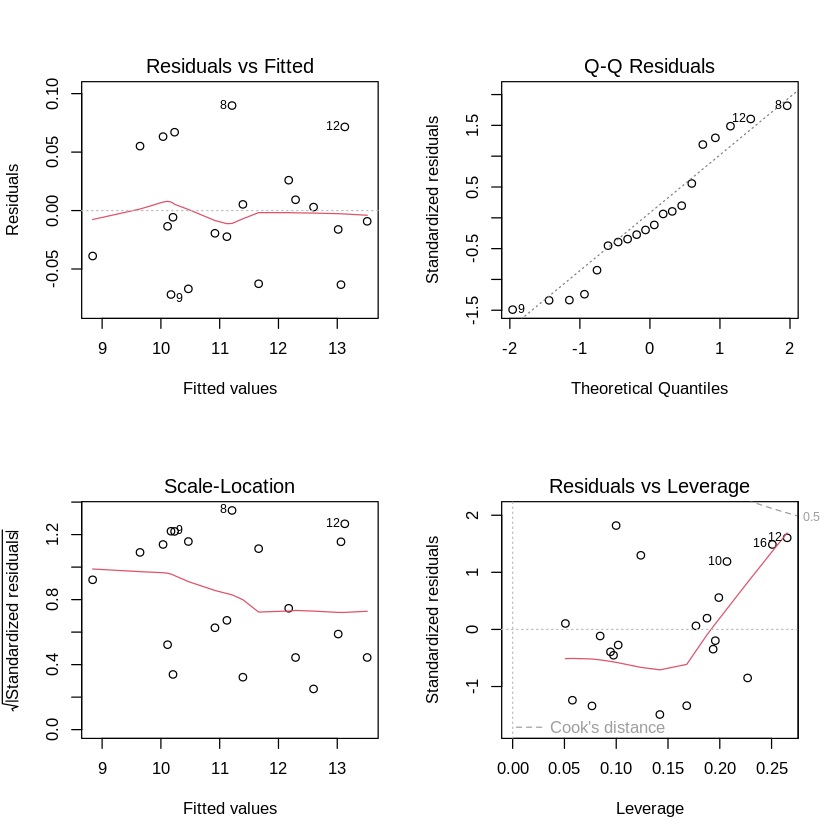

In [ ]:
par(mfrow=c(2,2))
plot(m0)

#### Answer to 3.24, 3

***Interpret the fitted model.***

`y` is a linear function of `x1` and `x2`.

#### Answer to 3.24, 4

***The data are actually randomly generated so that $μ = \sqrt{x_1^2 + x_2^2}$; that is, $x_1$ and $x_2$ are the lengths of the sides of a right-angled triangle, and $μ$ is the length of the hypotenuse (and some randomness has been added to produce $y$). What lesson does this demonstrate?***

I suppose the lesson is that a model can be fit to data, and it can fit well, but the model doesn't necessarily represent the data-generating process.

#### Answer to 3.24, 5

***Fit the model for modelling $μ = E[y^2]$, using the systematic component `I(x1^2) + I(x2^2) - 1`. Then use the t-test to confirm that the parameter estimates suggested by Pythagoras’ theorem are supported by the data.***

So we need to create a new variable, `mu <- d$y^2`, then fit it against the sum of squares of the `x` variables.  We use `-1` to tell R to fit the model without an intercept (Pythagoras' theorem does not have an intercept).

In [ ]:
d$mu <- d$y^2
m2 <- lm(mu ~ I(x1^2) + I(x2^2) - 1, data=d)
summary(m2)


Call:
lm(formula = mu ~ I(x1^2) + I(x2^2) - 1, data = d)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.90109 -0.60017 -0.03213  0.92115  2.45666 

Coefficients:
        Estimate Std. Error t value Pr(>|t|)    
I(x1^2)  1.03472    0.02263   45.73   <2e-16 ***
I(x2^2)  0.98910    0.00599  165.12   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.118 on 18 degrees of freedom
Multiple R-squared:  0.9999,	Adjusted R-squared:  0.9999 
F-statistic: 1.404e+05 on 2 and 18 DF,  p-value: < 2.2e-16


So Pythagoras' theorem is supported.  Is this model better than `m0`?

In [ ]:
AIC(m0); AIC(m2)

[1] -56.71412

[1] 65.12924

Apparently not.

## Question 3.25

In an experiment [39, p 122] conducted to investigate the amount of drug retained in the liver of a rat (Table 3.17; data set: `ratliver`), nineteen rats were randomly selected, weighed, and placed under light anesthetic and given an oral dose of the drug. Because large livers were thought to absorb more of a given dose than a small liver, the dose was approximately determined as 40 mg of the drug per kg of body weight. After a fixed length of time, each rat was sacrificed, the liver weighed, and the percentage dose in the liver $y$ determined.

1. Plot `DoseInLiver` against each explanatory variable, and identify important features to be modelled.

2. Fit a linear regression model with systematic component `DoseInLiver ~ BodyWt + LiverWt + Dose`.

3. Using t-tests, show that `BodyWt` and `Dose` are significant for modelling `DoseInLiver`.

4. In the study, the dose was determined as an approximate function of body weight, hence both variables `BodyWt` and `Dose` measure almost the same physical quantity. Why should both covariates be necessary in the model? By computing the appropriate statistics, show that Observation 3 has high leverage and is influential.

5. Plot `BodyWt` against `Dose`, and identify Observation 3 to see the problem.

6. Fit the same linear regression model, after omitting Observation 3. Use t-tests to show that *none* of the covariates are now statistically significant.

### Answers

In [ ]:
install.packages("GLMsData")
library(GLMsData)

data(ratliver)
d <- ratliver
head(d)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



,BodyWt,LiverWt,Dose,DoseInLiver
,<int>,<dbl>,<dbl>,<dbl>
1,176,6.5,0.88,0.42
2,176,9.5,0.88,0.25
3,190,9.0,1.00,0.56
4,176,8.9,0.88,0.23
5,200,7.2,1.00,0.23
6,167,8.9,0.83,0.32


#### Answer to 3.25, 1

***Plot `DoseInLiver` against each explanatory variable, and identify important features to be modelled.***

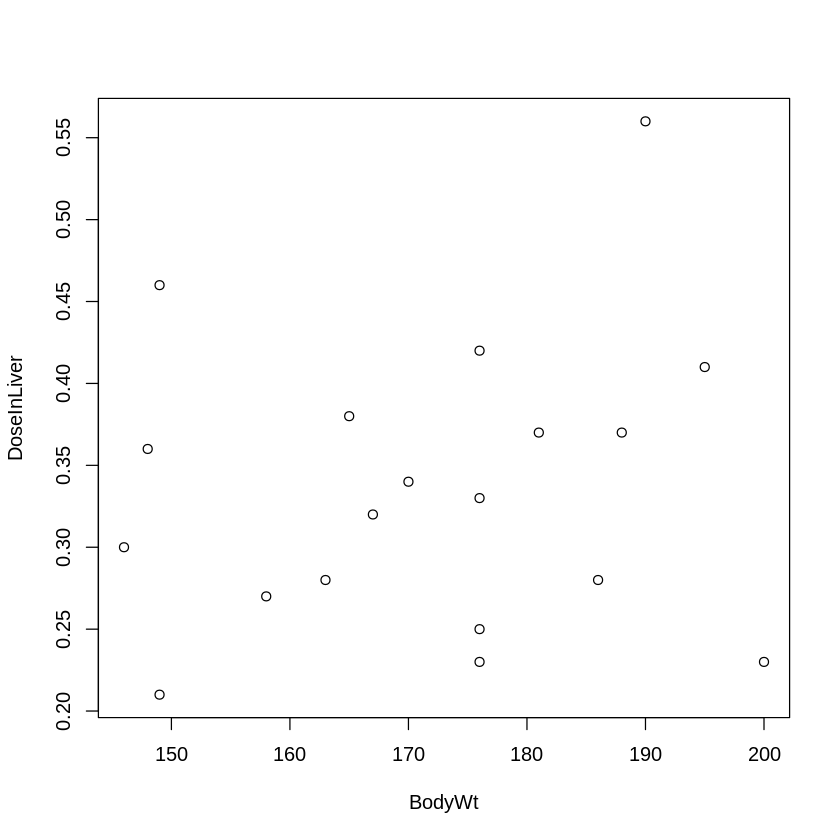

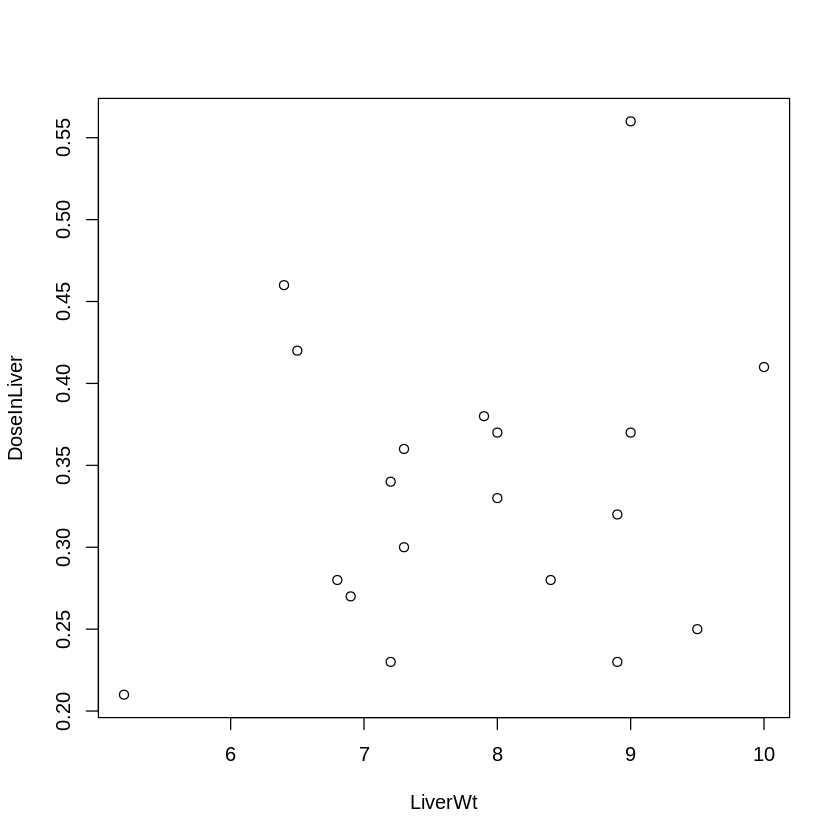

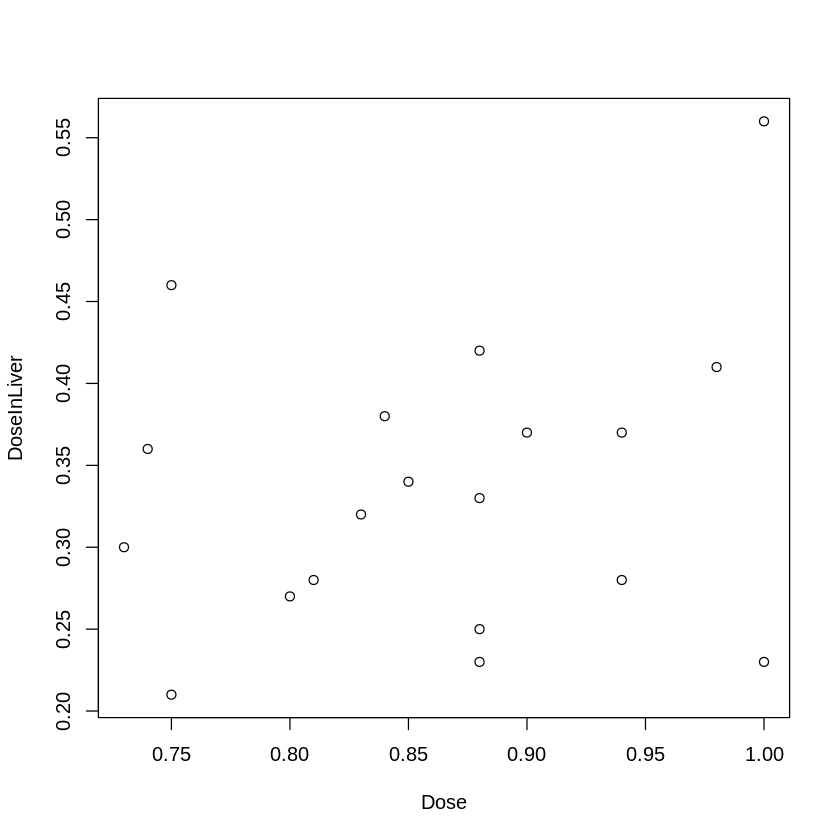

In [ ]:
plot(DoseInLiver ~ ., data=d)

#### Answer to 3.25, 2

***Fit a linear regression model with systematic component `DoseInLiver ~ BodyWt + LiverWt + Dose`.***

In [ ]:
m <- lm(DoseInLiver ~ ., data=d)

#### Answer to 3.25, 3

***Using t-tests, show that `BodyWt` and `Dose` are significant for modelling `DoseInLiver`.***

In [ ]:
summary(m)


Call:
lm(formula = DoseInLiver ~ ., data = d)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.100557 -0.063233  0.007131  0.045971  0.134691 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)  
(Intercept)  0.265922   0.194585   1.367   0.1919  
BodyWt      -0.021246   0.007974  -2.664   0.0177 *
LiverWt      0.014298   0.017217   0.830   0.4193  
Dose         4.178111   1.522625   2.744   0.0151 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.07729 on 15 degrees of freedom
Multiple R-squared:  0.3639,	Adjusted R-squared:  0.2367 
F-statistic:  2.86 on 3 and 15 DF,  p-value: 0.07197


#### Answer to 3.25, 4

***In the study, the dose was determined as an approximate function of body weight, hence both variables `BodyWt` and `Dose` measure almost the same physical quantity. Why should both covariates be necessary in the model? By computing the appropriate statistics, show that Observation 3 has high leverage and is influential.***

I'm not sure why, if `BodyWt` and `Dose` measure the same quantity, that both should be included in the model.  One possibility is that both `BodyWt` and `Dose` are measured with substantial error such that, although `Dose` is derived from `BodyWt`, these variable actually carry a lot of different information.  Let's plot these and look at the VIF.

In [ ]:
install.packages("car")
library(car)

,"round(vif(m), 2)"
,<dbl>
BodyWt,52.10
LiverWt,1.34
Dose,51.43


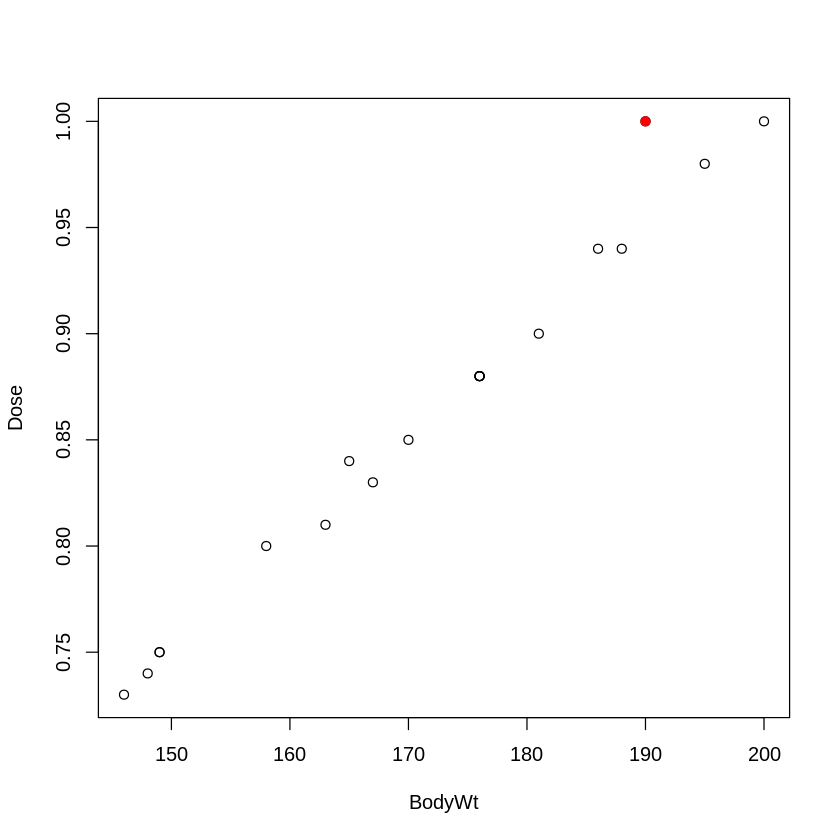

In [ ]:
plot(Dose ~ BodyWt, data=d)
points(d[3, "Dose"] ~ d[3, "BodyWt"], col="red", pch=19)

as.data.frame(round(vif(m),2))

It doesn't seem that measurement error is to blame, but Observation 3 *is* a little out of line.

Onto the next part of this question.

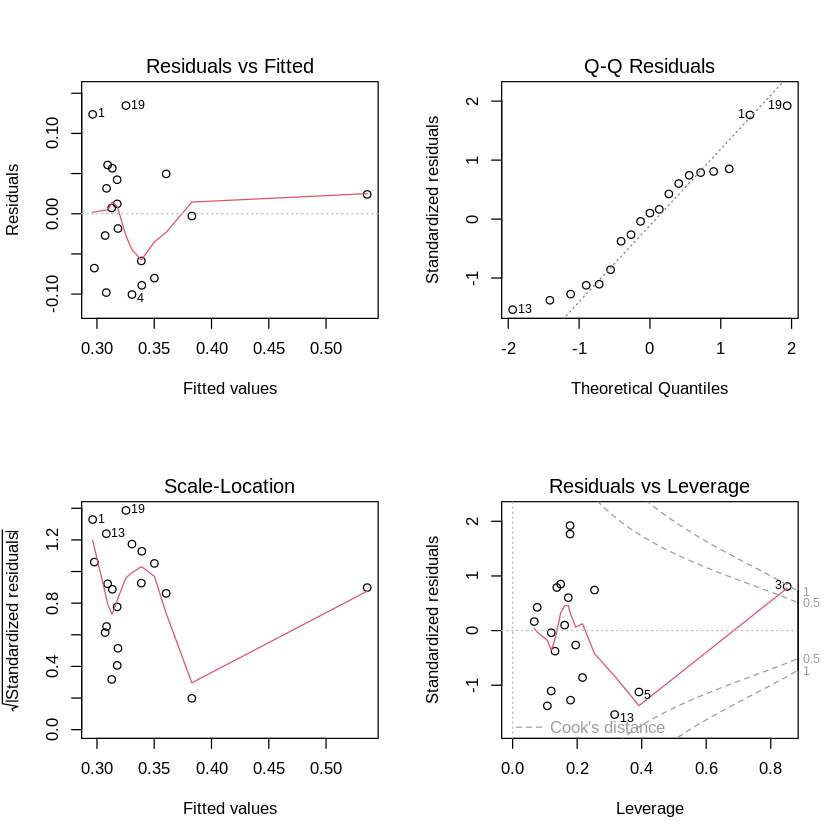

In [ ]:
par(mfrow=c(2,2))
plot(m)

#### Answer to 3.25, 5

***Plot `BodyWt` against `Dose`, and identify Observation 3 to see the problem.***

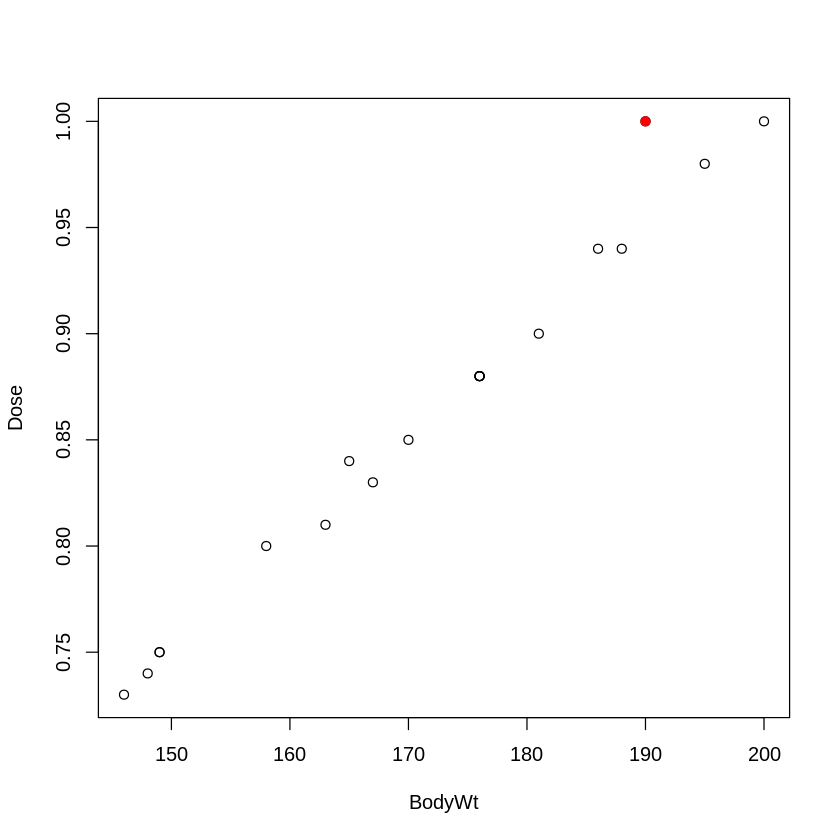

In [ ]:
plot(Dose ~ BodyWt, data=d)
points(d[3, "Dose"] ~ d[3, "BodyWt"], col="red", pch=19)

#### Answer to 3.25, 6

***Fit the same linear regression model, after omitting Observation 3. Use t-tests to show that none of the covariates are now statistically significant.***

In [ ]:
mb <- lm(DoseInLiver ~ ., data=d[-3,])
summary(mb)

as.data.frame(round(vif(mb),2))


Call:
lm(formula = DoseInLiver ~ ., data = d[-3, ])

Residuals:
      Min        1Q    Median        3Q       Max 
-0.102154 -0.056486  0.002838  0.046519  0.137059 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)
(Intercept)  0.311427   0.205094   1.518    0.151
BodyWt      -0.007783   0.018717  -0.416    0.684
LiverWt      0.008989   0.018659   0.482    0.637
Dose         1.484877   3.713064   0.400    0.695

Residual standard error: 0.07825 on 14 degrees of freedom
Multiple R-squared:  0.02106,	Adjusted R-squared:  -0.1887 
F-statistic: 0.1004 on 3 and 14 DF,  p-value: 0.9585


,"round(vif(mb), 2)"
,<dbl>
BodyWt,259.45
LiverWt,1.45
Dose,253.20


So apparently error was the culprit.

## Question 3.26

The amount of organic, inorganic and plant-available phosphorus was chemically determined [35] in eighteen soil samples (Table 3.18; data set: `phosphorus`), all tested at 20◦C.

1. Plot the plant-available phosphorous against both inorganic and organic phosphorus. Comment.

2. Fit the linear regression model with systematic component `PA ~ Inorg + Org`.

3. Use t-tests to identify which covariates are statistically significant.

4. Use appropriate statistics to identify any influential observations, and any observations with high leverage.

### Answers

In [ ]:
install.packages("GLMsData")
library(GLMsData)

data(phosphorus)
d <- phosphorus
head(d)

,Sample,Inorg,Org,PA
,<int>,<dbl>,<int>,<int>
1,1,0.4,53,64
2,2,0.4,23,60
3,3,3.1,19,71
4,4,0.6,34,61
5,5,4.7,24,54
6,6,1.7,65,77


#### Answer to 3.26, 1

***Plot the plant-available phosphorous against both inorganic and organic phosphorus. Comment.***

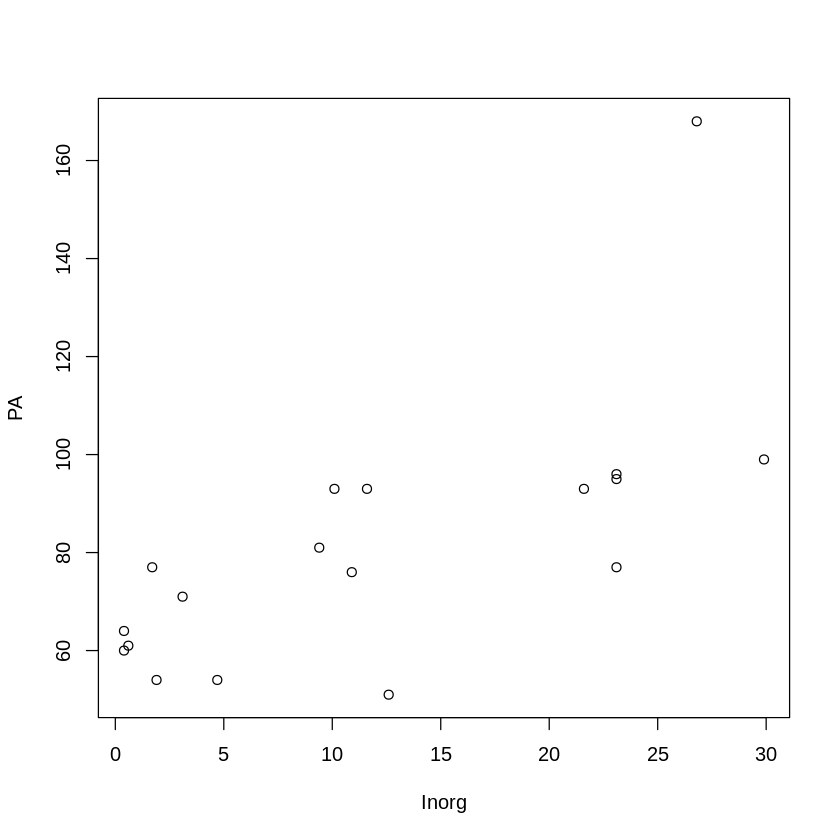

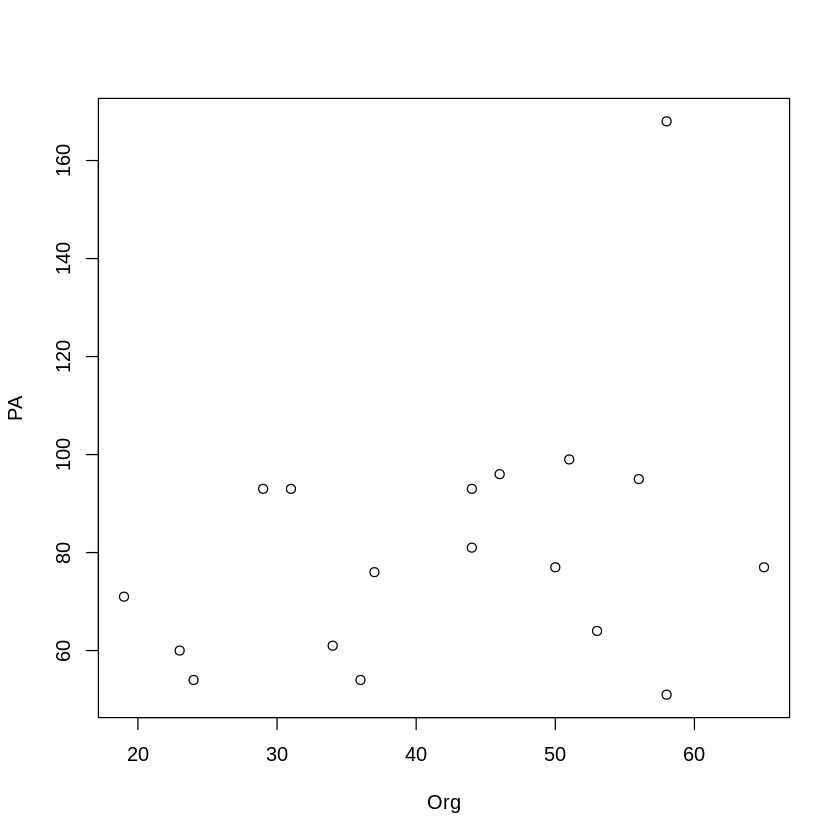

In [ ]:
plot(PA ~ Inorg + Org, data=d)

The plots look similar.

#### Answer to 3.26, 2

***Fit the linear regression model with systematic component `PA ~ Inorg + Org`.***

In [ ]:
m <- lm(PA ~ Inorg + Org, data=d)

#### Answer to 3.26, 3

***Use t-tests to identify which covariates are statistically significant.***

In [ ]:
summary(m)


Call:
lm(formula = PA ~ Inorg + Org, data = d)

Residuals:
    Min      1Q  Median      3Q     Max 
-32.828  -8.440  -1.118   6.694  58.757 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept) 56.25102   16.31074   3.449  0.00358 **
Inorg        1.78977    0.55674   3.215  0.00579 **
Org          0.08665    0.41494   0.209  0.83740   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 20.68 on 15 degrees of freedom
Multiple R-squared:  0.4823,	Adjusted R-squared:  0.4133 
F-statistic: 6.988 on 2 and 15 DF,  p-value: 0.00717


#### Answer to 3.26, 4

***Use appropriate statistics to identify any influential observations, and any observations with high leverage.***

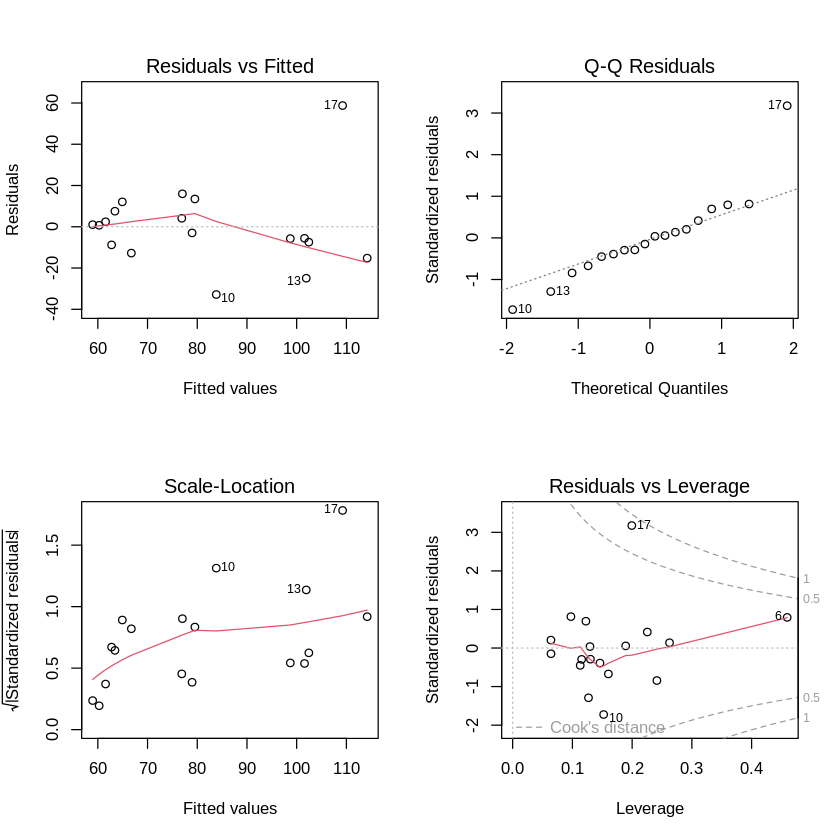

In [ ]:
par(mfrow=c(2,2))
plot(m)

Observation 17 is highly influential and high leverage.

## Question 3.27

Thirteen American footballers punted a football [26], and had their leg strengths measured (Table 3.19; data set: `punting`).

1. Plot punting distance $y$ against left leg strength $x_1$, and then against right leg strength $x_2$. Comment.
2. Show that collinearity is likely to be a problem.
3. Propose a sensible solution to the collinearity problem.
4. Determine a suitable model for the data, ensuring a diagnostics analysis.
5. Interpret the final model.

### Answers

In [ ]:
install.packages("GLMsData")
library(GLMsData)

data(punting)
d <- punting
head(d)

,Left,Right,Punt
,<int>,<int>,<dbl>
1,170,170,162.50
2,130,140,144.00
3,170,180,174.50
4,160,160,163.50
5,150,170,192.00
6,150,150,171.75


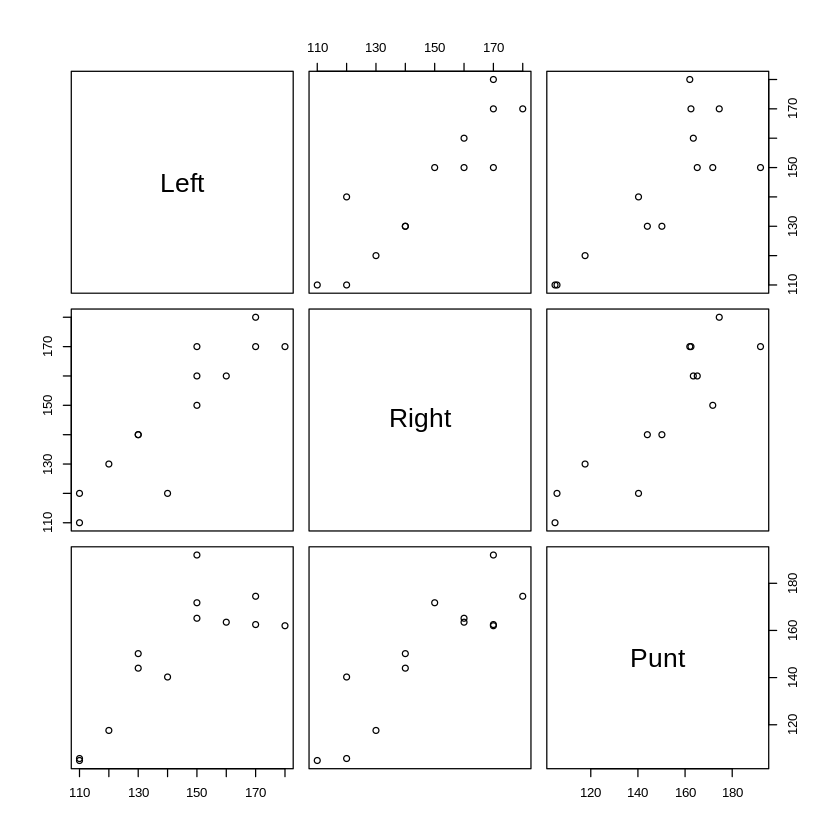

In [ ]:
pairs(d)

Predictably, there is some strong positive correlations among the variables, implying that collinearity may be a problem; we could show this conclusively with `vif()`, but the question asks to show that it is "likely"--so let's use basic regression instead.  If the coefficients for `Left` and `Right` are highly uncertain, that (combined with these plots) suggests that collinearity is likely.

In [ ]:
m <- lm(Punt ~ ., d)
summary(m)


Call:
lm(formula = Punt ~ ., data = d)

Residuals:
     Min       1Q   Median       3Q      Max 
-14.5398 -11.8899  -0.3279   8.8361  20.3500 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)  -5.1645    26.6779  -0.194    0.850  
Left          0.1370     0.3944   0.347    0.735  
Right         0.9192     0.3968   2.317    0.043 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 13.93 on 10 degrees of freedom
Multiple R-squared:  0.778,	Adjusted R-squared:  0.7336 
F-statistic: 17.53 on 2 and 10 DF,  p-value: 0.0005387


Well, that's not what I expected, so let's use the `vif()` command.

In [ ]:
install.packages("car")
library(car)
as.data.frame(round(vif(m),2))

,"round(vif(m), 2)"
,<dbl>
Left,5.06
Right,5.06


So `vif` > 5.  So let's proceed as though collinearity is a problem.

To solve this, since `Left` and `Right` are duplicating a lot of information, we can just regress on one or the other.

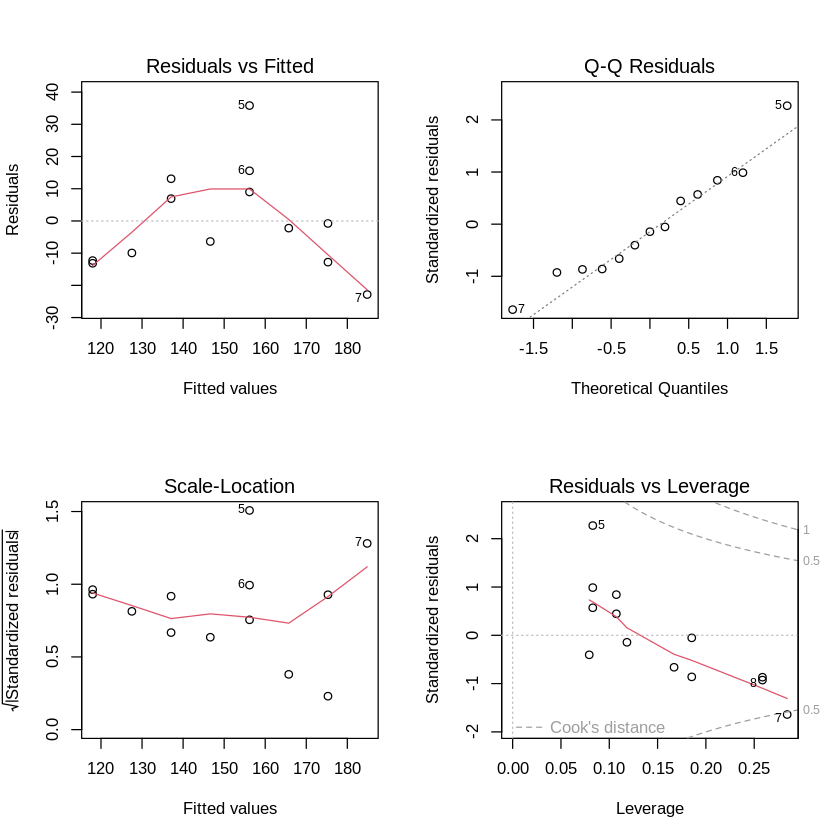

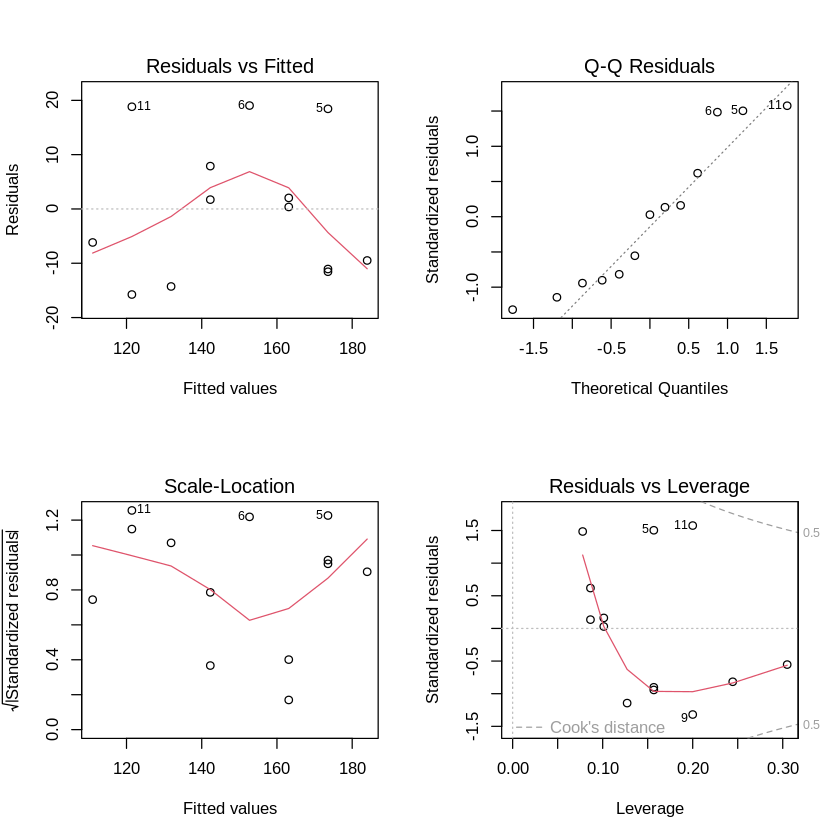

In [ ]:
m_L <- lm(Punt ~ Left, d)
m_R <- lm(Punt ~ Right, d)

par(mfrow=c(2,2))
plot(m_L)

par(mfrow=c(2,2))
plot(m_R)

Both models are suffering from a few fitting problems.

In [ ]:
summary(m_L)
summary(m_R)


Call:
lm(formula = Punt ~ Left, data = d)

Residuals:
    Min      1Q  Median      3Q     Max 
-22.840 -12.298  -2.234   8.990  35.820 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  12.8834    30.1575   0.427 0.677474    
Left          0.9553     0.2072   4.610 0.000753 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 16.46 on 11 degrees of freedom
Multiple R-squared:  0.6589,	Adjusted R-squared:  0.6279 
F-statistic: 21.25 on 1 and 11 DF,  p-value: 0.0007528



Call:
lm(formula = Punt ~ Right, data = d)

Residuals:
     Min       1Q   Median       3Q      Max 
-15.7576 -11.0611   0.3656   7.8890  19.0423 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -3.6930    25.2649  -0.146    0.886    
Right         1.0427     0.1692   6.162 7.09e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 13.36 on 11 degrees of freedom
Multiple R-squared:  0.7754,	Adjusted R-squared:  0.7549 
F-statistic: 37.97 on 1 and 11 DF,  p-value: 7.088e-05


The inferences are about the same from both models.  I wonder if one leg performs better than the other via AIC.

In [ ]:
AIC(m_L); AIC(m_R)

[1] 113.5432

[1] 108.1138

Since it seems that observation 7 may be weirdo, let's repeat without it.

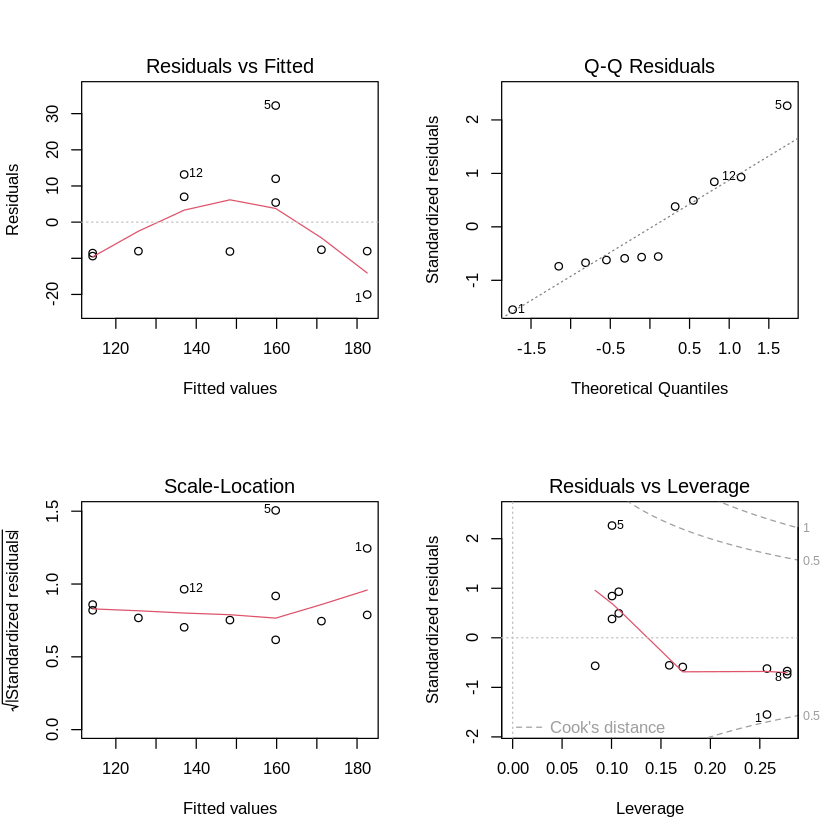

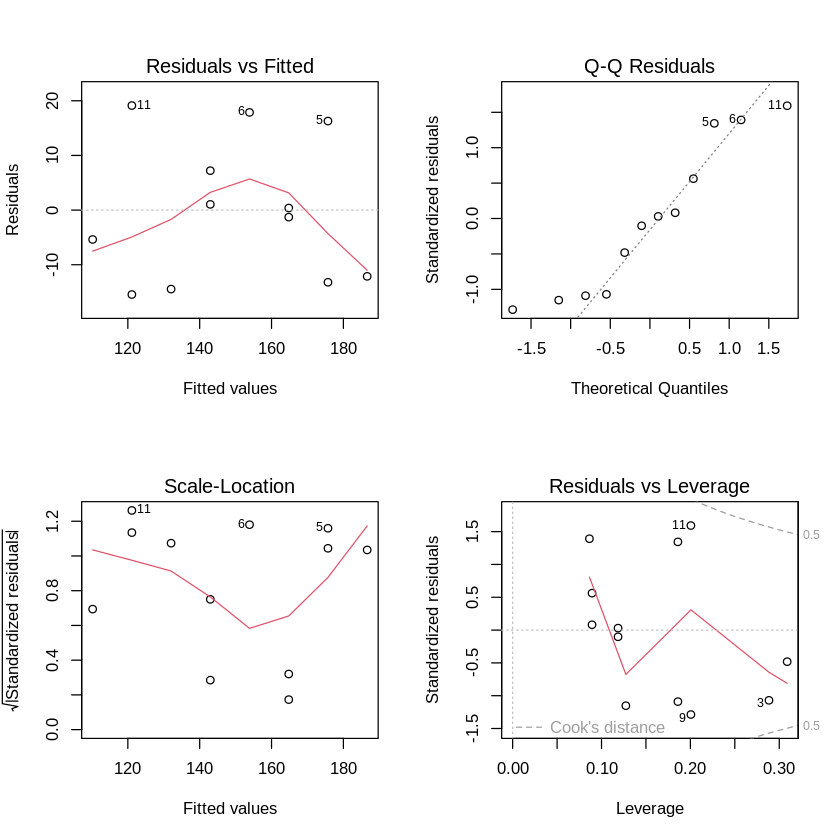

In [ ]:
m_L.7x <- lm(Punt ~ Left, d[-7,])
m_R.7x <- lm(Punt ~ Right, d[-7,])

par(mfrow=c(2,2))
plot(m_L.7x)

par(mfrow=c(2,2))
plot(m_R.7x)

In [ ]:
summary(m_L.7x)
summary(m_R.7x)


Call:
lm(formula = Punt ~ Left, data = d[-7, ])

Residuals:
    Min      1Q  Median      3Q     Max 
-20.024  -8.237  -7.833   8.250  32.240 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -10.9681    30.5206  -0.359 0.726794    
Left          1.1382     0.2145   5.306 0.000345 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 15 on 10 degrees of freedom
Multiple R-squared:  0.7379,	Adjusted R-squared:  0.7117 
F-statistic: 28.15 on 1 and 10 DF,  p-value: 0.0003447



Call:
lm(formula = Punt ~ Right, data = d[-7, ])

Residuals:
     Min       1Q   Median       3Q      Max 
-15.4529 -12.3991  -0.4583   9.4812  19.1271 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -9.888     26.251  -0.377 0.714278    
Right          1.092      0.178   6.132 0.000111 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 13.43 on 10 degrees of freedom
Multiple R-squared:  0.7899,	Adjusted R-squared:  0.7689 
F-statistic: 37.61 on 1 and 10 DF,  p-value: 0.0001109


In [ ]:
AIC(m_L.7x); AIC(m_R.7x)

[1] 102.8658

[1] 100.2088

## Question 3.28

The age and salary of the chief executive officers (CEO) of small companies in 1993 (Table 3.20; data set: `ceo`) were published by Forbes magazine [34]. (Small companies were defined as those with annual sales greater than \$5 million and less than \$350 million, according to 5-year average return on investment.) Find a suitable model for the data, and supply appropriate diagnostics to show the model is appropriate.

### Answer

In [ ]:
install.packages("GLMsData")
library(GLMsData)

data(ceo)
d <- ceo
head(d)

,Age,Salary
,<int>,<int>
1,53,145
2,43,621
3,33,262
4,45,208
5,46,362
6,55,424


I'm not sure what `Age` refers to, so let's look at the data file.

In [ ]:
?ceo

It refers to the `Age` of the CEO.

We only have two variables to work with here.  Let's start by plotting; I'm going to plot both raw and log values.

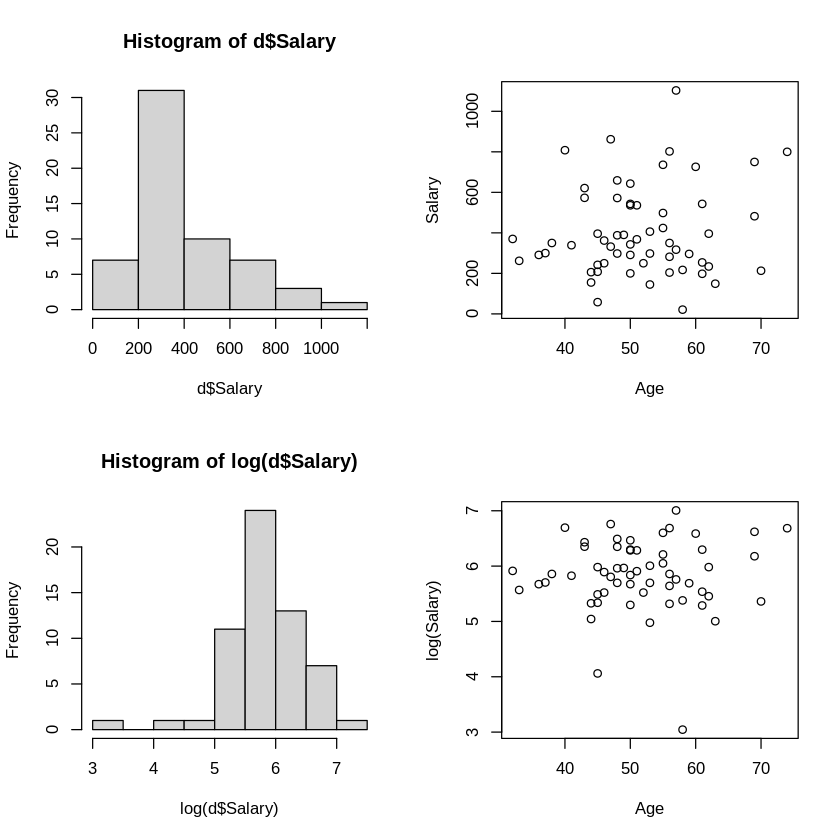

In [ ]:
par(mfrow=c(2,2))

hist(d$Salary)
plot(Salary ~ Age, d)
hist(log(d$Salary))
plot(log(Salary) ~ Age, d)

There doesn't seem to be much going between these two variables; maybe a positive relation between `log(Salary)` and `Age`.  Let's continue with `log(Salary)` to better conform to normal linear regression.

I think we should fit both an intercept-only model, and a model regressing on `Age`.

In [ ]:
m0 <- lm(log(Salary) ~ 1, data=d)
m1 <- lm(log(Salary) ~ Age, data=d)

anova(m0, m1)
AIC(m0); AIC(m1)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,58,24.72497,NA,NA,NA,NA
2,57,24.68106,1,0.04391191,0.1014129,0.7513045


[1] 120.121

[1] 122.0162

It does not seem that including `Age` shows much improvement beyond the intercept-only.  Let's look at the diagnostic plots.

hat values (leverages) are all = 0.01694915
 and there are no factor predictors; no plot no. 5



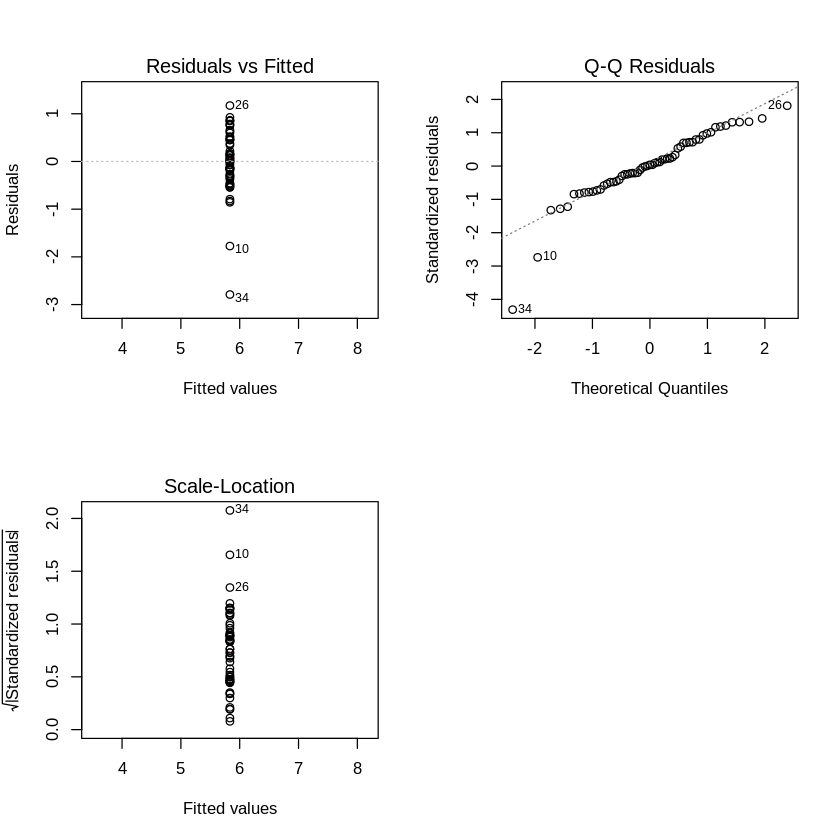

In [ ]:
par(mfrow=c(2,2))
plot(m0)

Why do the plots look like this?  Because we only have an intercept.  Why are all hat values = 0.0169...? Because the hat value for the intercept is 1/n.

Nevertheless, we see a few strangely-low values; perhaps CEOs foregoing large payments or being compensated in ways not reported in this data.  So let's see what happens when we remove them.

In [ ]:
m0.x <- lm(log(Salary) ~ 1, data=d[-c(10,34),])
m1.x <- lm(log(Salary) ~ Age, data=d[-c(10,34),])

anova(m0.x, m1.x)
AIC(m0.x); AIC(m1.x)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,56,13.43516,NA,NA,NA,NA
2,55,13.34155,1,0.09361414,0.3859206,0.5370178


[1] 83.38396

[1] 84.9854

Once again, an intercept-only model seems appropriate.

## Question 3.29

A study of computer tomography (CT) interventions [32, 43] in the abdomen measured the total procedure time and the total radiation dose received (Table 3.21; data set: `fluoro`). During these procedures, “one might postulate that the radiation dose received is related to. . . the total procedure time” [43, p. 619].

1. Plot the dose against the exposure time, and comment.

2. Fit the linear regression model for modelling dose from exposure time. Produce the residual plots, and show that the variance is not constant.

3. Try using various transformations of the response variable. Fit these model, and re-examine the residual plots to determine a suitable transformation.

4. Test the hypothesis implied by the quote given original article.

5. Interpret the final model.

### Answers

In [ ]:
install.packages("GLMsData")
library(GLMsData)

data(fluoro)
d <- fluoro
head(d)

,Time,Dose
,<int>,<dbl>
1,37,4.39
2,48,3.46
3,52,8.00
4,57,5.47
5,58,8.00
6,61,18.92


#### Answer 3.29, 1

***Plot the dose against the exposure time, and comment.***

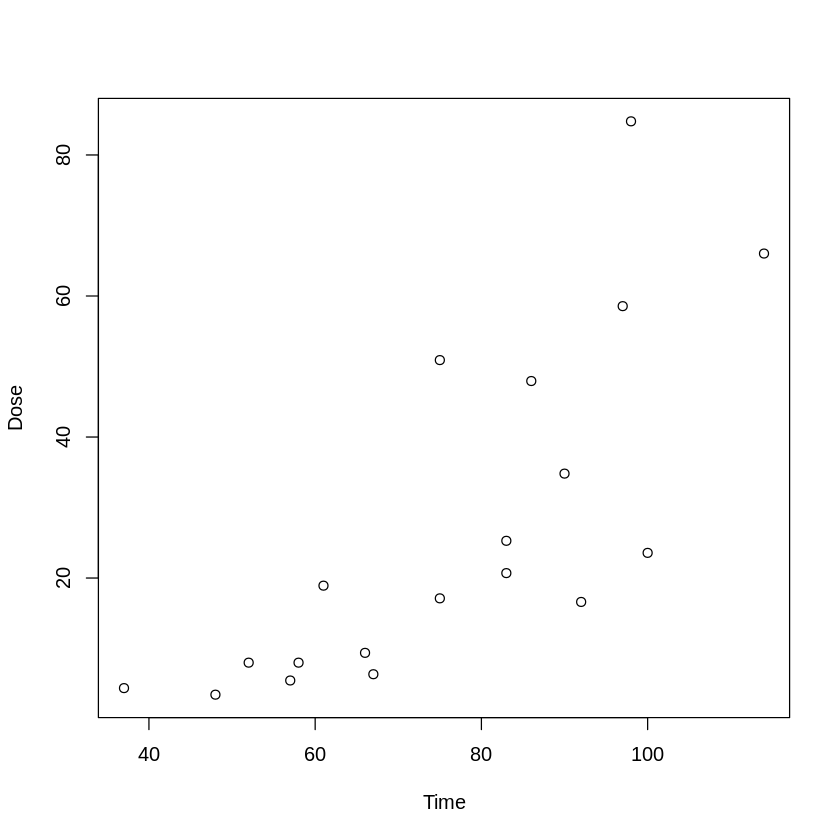

In [ ]:
plot(Dose ~ Time, d)

There may be a nonlinear fit with heterogeneity.

Let's see how `Dose` and `log(Dose)` look against `log(Time)`.

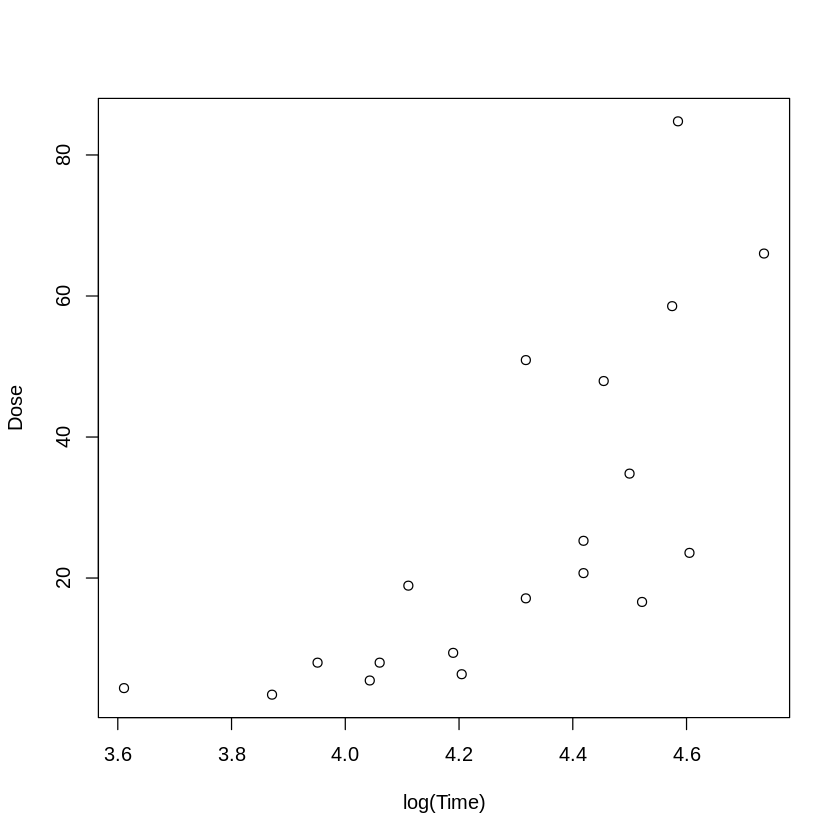

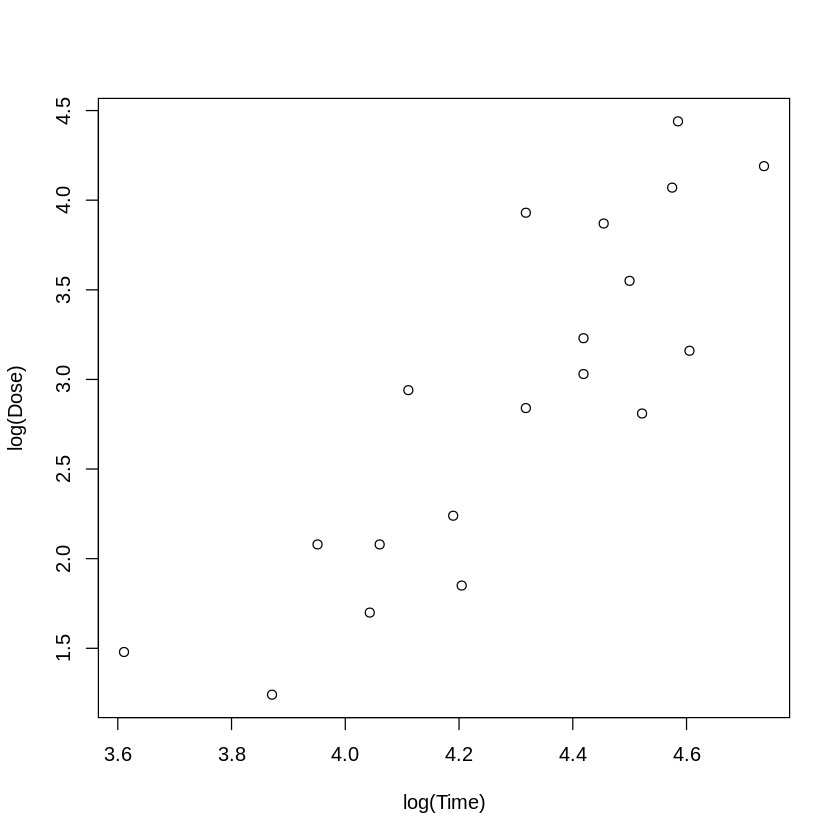

In [ ]:
plot(Dose ~ log(Time), d)

plot(log(Dose) ~ log(Time), d)

#### Answer to 3.29, 2

***Fit the linear regression model for modelling dose from exposure time. Produce the residual plots, and show that the variance is not constant.***

Let's fit all three options we plotted.

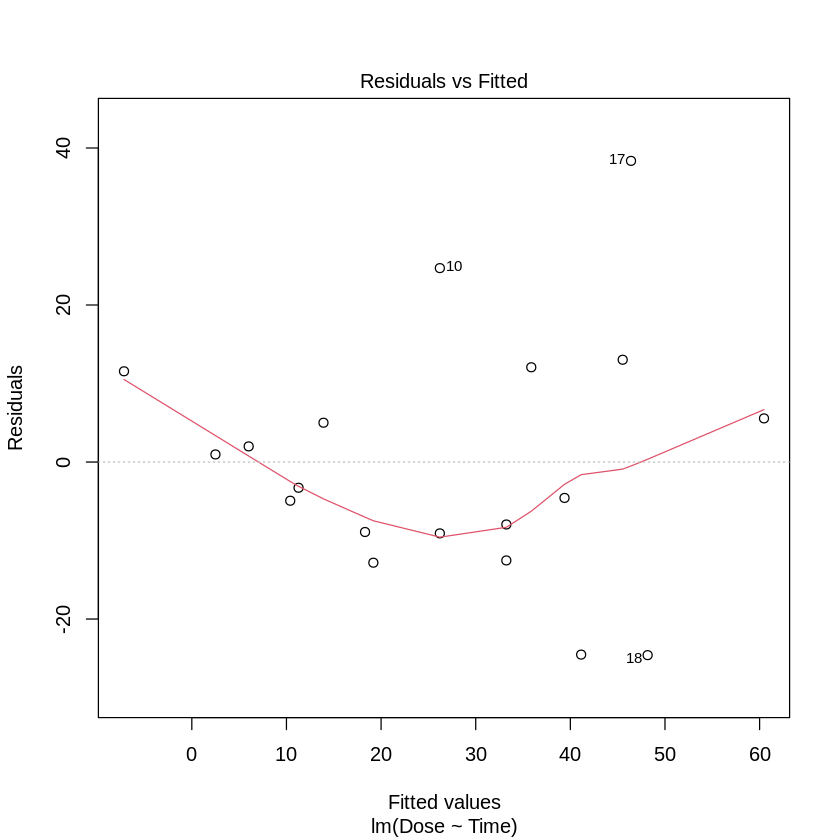

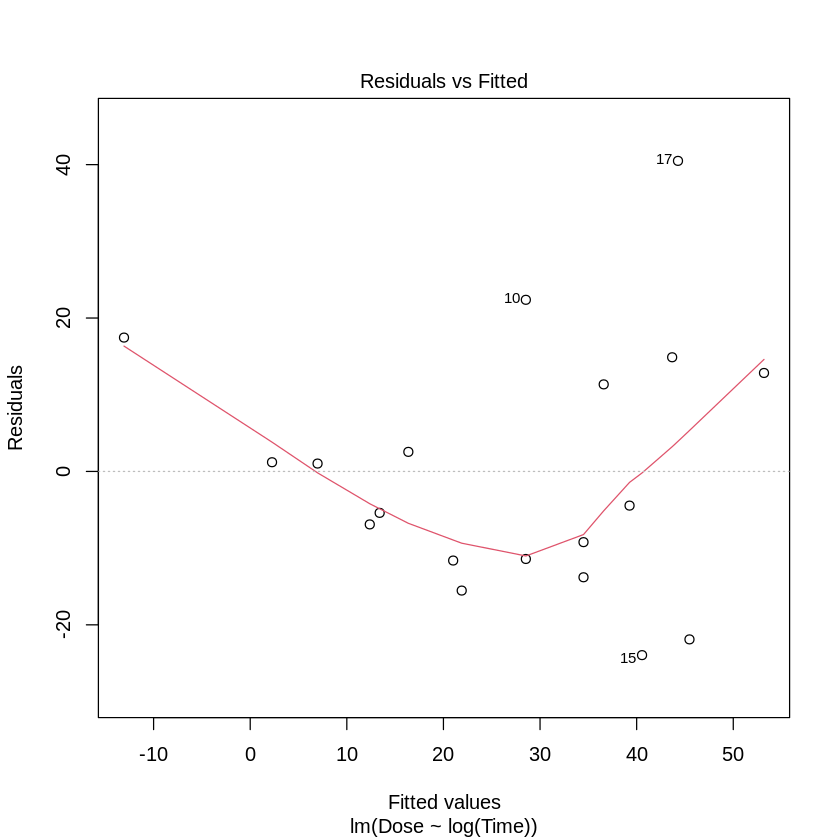

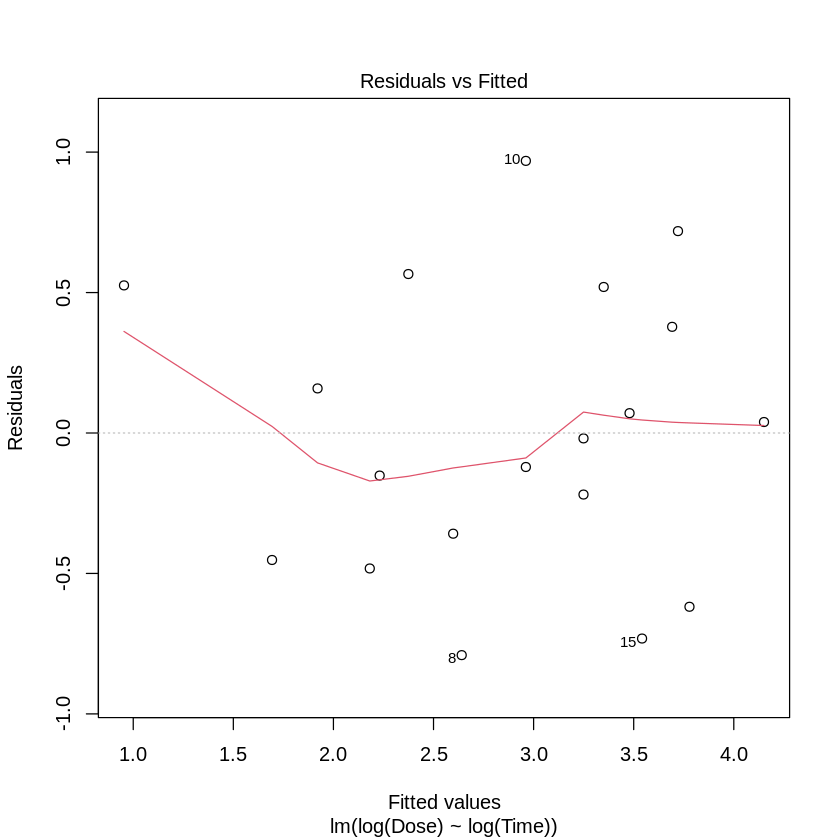

In [ ]:
m <- lm(Dose ~ Time, d)
m.l <- lm(Dose ~ log(Time), d)
m.ll <- lm(log(Dose) ~ log(Time), d)

plot(m, 1)
plot(m.l, 1)
plot(m.ll, 1)

Looking at the "Residuals vs Fitted" plots, the heterogenity of `m` is apparent, but `m.ll` looks pretty homogeneous.

We could test this more formally by actually regressing the (squared) residuals on the fitted values (I'll use an additional fitted^2).  This is called the White test; learn more about it with [this video](https://youtu.be/M5xqpKzhyAM?si=7FSYp2mYE5VNxk7e) by Ben Lambert.

In [ ]:
f_m <- summary(lm(resid(m)^2 ~ poly(fitted(m),2)))$fstatistic
p_m <- pf(f_m["value"], f_m["numdf"], f_m["dendf"], lower.tail=FALSE)

f_m.l <- summary(lm(resid(m.l)^2 ~ poly(fitted(m.l),2)))$fstatistic
p_m.l <- pf(f_m.l["value"], f_m.l["numdf"], f_m.l["dendf"], lower.tail=FALSE)

f_m.ll <- summary(lm(resid(m.ll)^2 ~ poly(fitted(m.ll),2)))$fstatistic
p_m.ll <- pf(f_m.ll["value"], f_m.ll["numdf"], f_m.ll["dendf"], lower.tail=FALSE)

# p-values
p_m; p_m.l; p_m.ll

value 
0.2119536

value 
0.1852924

value 
0.9224409

By the White test, none of our models are heteroskadistic, but that assume a valid null hypothesis is that they *are NOT* heteroskadistic.  Let's go on with the conclusion that the `m.ll` model is best.

#### Answer to 3.29, 3

***Try using various transformations of the response variable. Fit these model, and re-examine the residual plots to determine a suitable transformation.***

Done above.

#### Answer to 3.29, 4 and 5

***Test the hypothesis implied by the quote given original article.***

> ***During these procedures, “one might postulate that the radiation dose received is related to. . . the total procedure time”***

***Interpret the final model***.

Let's use `m.ll`.  Technically, this will test the hypothesis that "log radiation dose is related to total procedure log time".

In [ ]:
summary(m.ll)


Call:
lm(formula = log(Dose) ~ log(Time), data = d)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.79081 -0.40528 -0.01923  0.44889  0.96876 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -9.3051     1.8194  -5.114 8.63e-05 ***
log(Time)     2.8411     0.4233   6.712 3.65e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5253 on 17 degrees of freedom
Multiple R-squared:  0.7261,	Adjusted R-squared:  0.7099 
F-statistic: 45.06 on 1 and 17 DF,  p-value: 3.645e-06


The significant result for the coefficient of `log(Time)` suggests the hypothesis is correct.

## Question 3.30

The average butterfat content of milk from dairy cows was recorded for each of five breeds of cattle [18, 36]. Random samples of ten mature (older than 4 years) and ten 2-year olds were taken (Table 3.22; data set: `butterfat`).

1. Plot the percentage butterfat against breed, and also against age. Discuss any features of the data that are apparent.

2. Use various transformation to make the variance of the response approximately constant. Which transformation appears appropriate? Does using `boxcox()` help with the decision?

3. Fit an appropriate linear regression model, and interpret the appropriate diagnostics.

### Answers

In [ ]:
install.packages("GLMsData")
library(GLMsData)

data(butterfat)
d <- butterfat
head(d)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



,Butterfat,Breed,Age
,<dbl>,<fct>,<fct>
1,3.74,Ayrshire,Mature
2,4.01,Ayrshire,2year
3,3.77,Ayrshire,Mature
4,3.78,Ayrshire,2year
5,4.10,Ayrshire,Mature
6,4.06,Ayrshire,2year


#### Answer to 3.30, 1

***Plot the percentage butterfat against breed, and also against age. Discuss any features of the data that are apparent.***

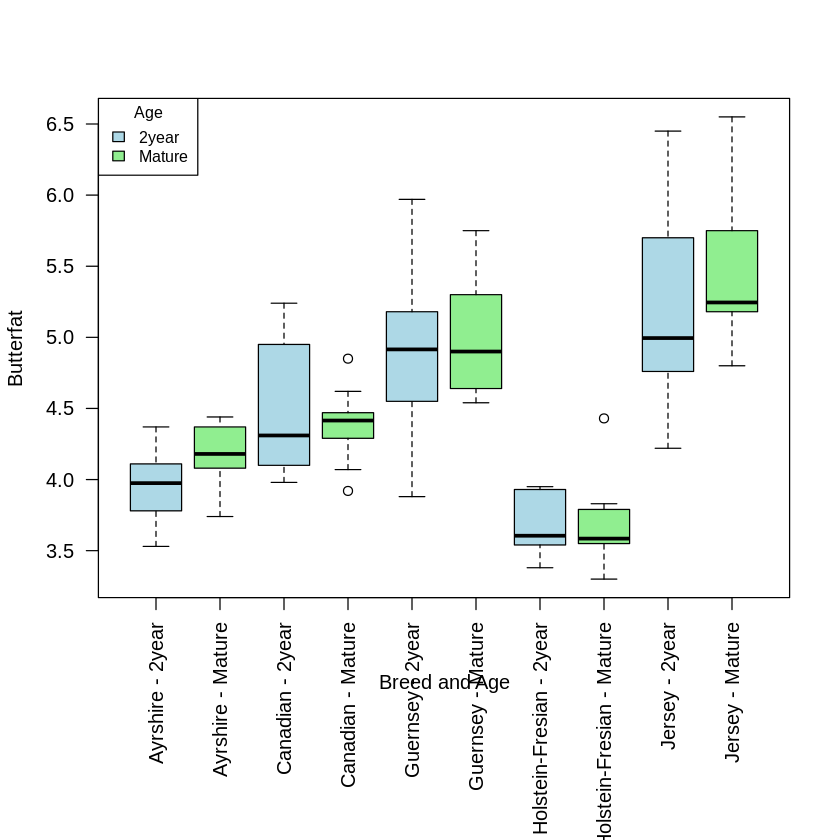

In [ ]:
d$Breed <- factor(d$Breed, levels = unique(d$Breed))
d$Age <- factor(d$Age, levels = c("2year", "Mature"))

split_data <- with(d, split(Butterfat, list(Breed, Age)))
split_data <- split_data[order(names(split_data))]
labels <- names(split_data)
labels <- gsub("\\.", " - ", labels)
age_levels <- levels(d$Age)  # "2year", "Mature"
age_colors_mapping <- setNames(c("lightblue", "lightgreen"), age_levels)
ages_for_colors <- sapply(strsplit(labels, " - "), `[`, 2)
color_vector <- age_colors_mapping[ages_for_colors]
par(mar = c(10, 4, 4, 2) + 0.1)  # Bottom, left, top, right


boxplot(split_data,
        names = labels,
        col = color_vector,
        xlab = "Breed and Age",
        ylab = "Butterfat",
        las = 2)


legend("topleft",
       legend = age_levels,
       fill = age_colors_mapping,
       title = "Age",
       cex = 0.8)

I don't like the open ended questions like "Discuss any apparent features" because that which is salient often depends on the understanding of the subject matter.  Here, I might say that the young cows typically have more spread in butterfat, but that the central tendencies are similar between ages within breeds.

#### Answer to 3.30, 2

***Use various transformation to make the variance of the response approximately constant. Which transformation appears appropriate? Does using `boxcox()` help with the decision?***

Warning message:
“In lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) :
 extra argument ‘main’ will be disregarded”


[1] -1.4

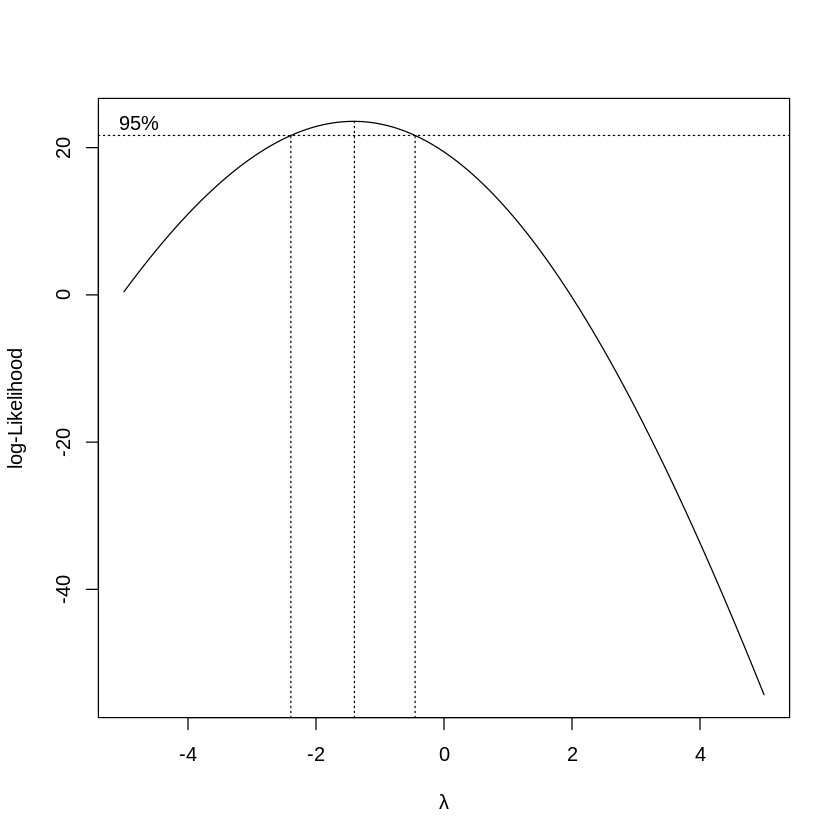

In [ ]:
library(MASS)

# Fit a linear model with only an intercept
m0 <- lm(Butterfat ~ Age*Breed, data = d)

# Perform Box-Cox transformation to find the optimal lambda
bc <- boxcox(m0,
            lambda = seq(-5, 5, by = 0.1),
            plotit = TRUE,
            main = "Box-Cox Transformation for Butterfat")

# Identify the lambda with the maximum log-likelihood
(optimal_lambda <- bc$x[which.max(bc$y)])

boxcox_transform <- function(x, lambda) {
  if(lambda == 0) {
    return(log(x))
  } else {
    return((x^lambda - 1) / lambda)
  }
}
d$Butterfat_bc <- boxcox_transform(d$Butterfat, optimal_lambda)

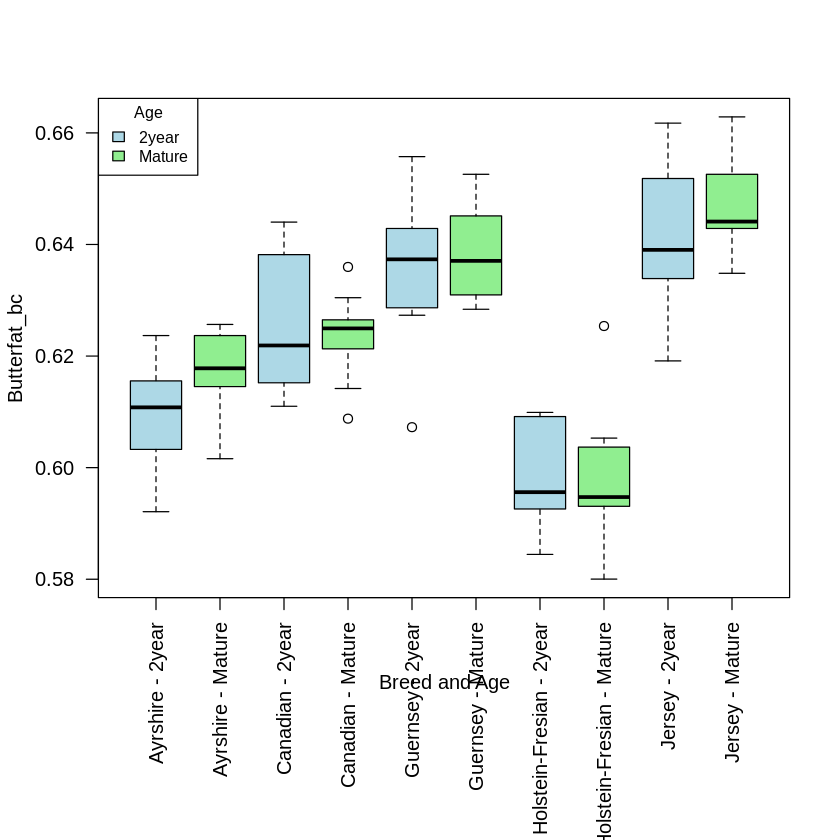

In [ ]:
split_data <- with(d, split(Butterfat_bc, list(Breed, Age)))
split_data <- split_data[order(names(split_data))]
labels <- names(split_data)
labels <- gsub("\\.", " - ", labels)
age_levels <- levels(d$Age)  # "2year", "Mature"
age_colors_mapping <- setNames(c("lightblue", "lightgreen"), age_levels)
ages_for_colors <- sapply(strsplit(labels, " - "), `[`, 2)
color_vector <- age_colors_mapping[ages_for_colors]
par(mar = c(10, 4, 4, 2) + 0.1)  # Bottom, left, top, right


boxplot(split_data,
        names = labels,
        col = color_vector,
        xlab = "Breed and Age",
        ylab = "Butterfat_bc",
        las = 2)


legend("topleft",
       legend = age_levels,
       fill = age_colors_mapping,
       title = "Age",
       cex = 0.8)

Let's apply the White (see previous problem) test to see if we improved our heteroskadicity.

In [ ]:
m <- lm(Butterfat ~ Age*Breed, data=d)
m.bc <- lm(Butterfat_bc ~ Age*Breed, data=d)

f_m <- summary(lm(resid(m)^2 ~ poly(fitted(m),2)))$fstatistic
p_m <- pf(f_m["value"], f_m["numdf"], f_m["dendf"], lower.tail=FALSE)

f_m.bc <- summary(lm(resid(m.bc)^2 ~ poly(fitted(m.bc),2)))$fstatistic
p_m.bc <- pf(f_m.bc["value"], f_m.bc["numdf"], f_m.bc["dendf"], lower.tail=FALSE)

# p-values
p_m; p_m.bc

value 
0.004837842

value 
0.9941226

Based on the p-values, it seems we have.

#### Answer to 3.30, 3

***Fit an appropriate linear regression model, and interpret the appropriate diagnostics***

We've already fit the model (`m.bc`).  Let's look at the diagnostics.

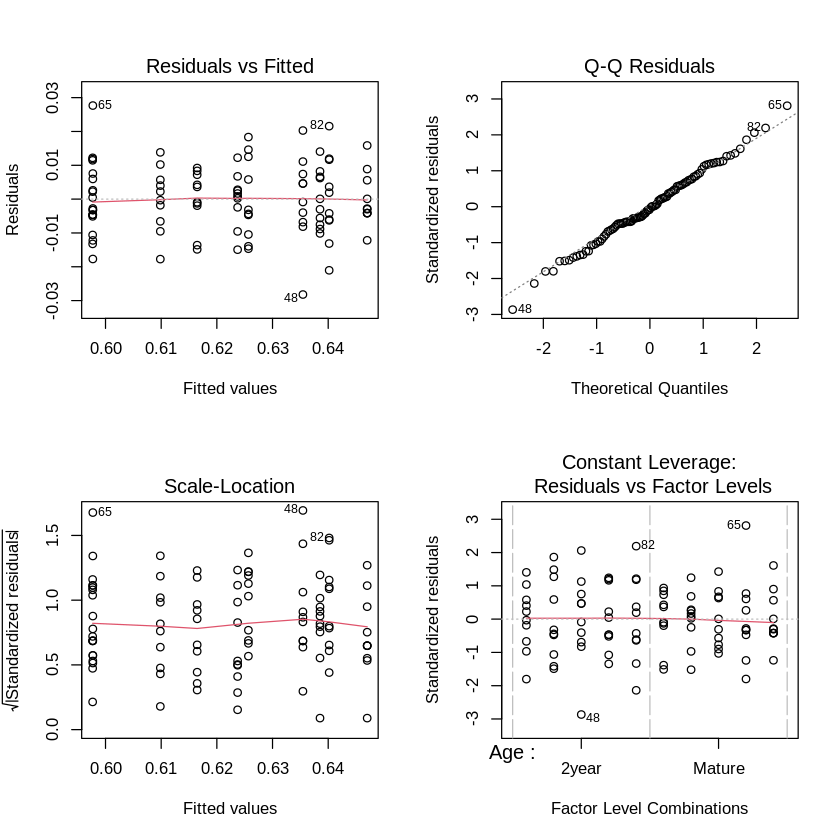

In [ ]:
par(mfrow=c(2,2))
plot(m.bc)